<a href="https://colab.research.google.com/github/alexchen1999/TMT-mouse-liver-proteomics/blob/main/TMT_mice_study_proteomics_processing_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load in datasets, sample annotations
import pandas as pd

base_dir = '/content/drive/MyDrive/JHU/Cahan Lab/TMT_mouse_data/'

cc_proteins = pd.read_csv(base_dir+'cc_scaled_protein_dat_long.csv')
do_proteins = pd.read_csv(base_dir+'do_scaled_protein_dat_long.csv')

In [ ]:
cc_alb = cc_proteins[cc_proteins['symbol'] == 'Alb']
do_alb = do_proteins[do_proteins['symbol'] == 'Alb']

In [ ]:
cc_alb

,protein.id,sample.id,symbol,Intensity,Batch,tag,strain,Sex,mouse.id
283125,ENSMUSP00000031314,TMT1~126,Alb,14.745931,TMT1,126,CC004,M,CC004_M
283126,ENSMUSP00000031314,TMT1~127c,Alb,14.486740,TMT1,127c,CC042,M,CC042_M
283127,ENSMUSP00000031314,TMT1~127n,Alb,15.137120,TMT1,127n,CC057,F,CC057_F
283128,ENSMUSP00000031314,TMT1~128c,Alb,14.907900,TMT1,128c,CC002,M,CC002_M
283129,ENSMUSP00000031314,TMT1~128n,Alb,14.943935,TMT1,128n,CC013,M,CC013_M
...,...,...,...,...,...,...,...,...,...
283245,ENSMUSP00000031314,TMT9~129n,Alb,15.216376,TMT9,129n,CC071,F,CC071_F
283246,ENSMUSP00000031314,TMT9~130c,Alb,14.569429,TMT9,130c,CC043,F,CC043_F
283247,ENSMUSP00000031314,TMT9~130n,Alb,14.716077,TMT9,130n,CC026,F,CC026_F
283248,ENSMUSP00000031314,TMT9~131,Alb,15.036916,TMT9,131,CC036,M,CC036_M


In [ ]:
cc_alb = cc_alb[~cc_alb['mouse.id'].duplicated()]

In [ ]:
cc_alb

,protein.id,sample.id,symbol,Intensity,Batch,tag,strain,Sex,mouse.id
283125,ENSMUSP00000031314,TMT1~126,Alb,14.745931,TMT1,126,CC004,M,CC004_M
283126,ENSMUSP00000031314,TMT1~127c,Alb,14.486740,TMT1,127c,CC042,M,CC042_M
283127,ENSMUSP00000031314,TMT1~127n,Alb,15.137120,TMT1,127n,CC057,F,CC057_F
283128,ENSMUSP00000031314,TMT1~128c,Alb,14.907900,TMT1,128c,CC002,M,CC002_M
283129,ENSMUSP00000031314,TMT1~128n,Alb,14.943935,TMT1,128n,CC013,M,CC013_M
...,...,...,...,...,...,...,...,...,...
283244,ENSMUSP00000031314,TMT9~129c,Alb,14.535633,TMT9,129c,CC029,M,CC029_M
283245,ENSMUSP00000031314,TMT9~129n,Alb,15.216376,TMT9,129n,CC071,F,CC071_F
283246,ENSMUSP00000031314,TMT9~130c,Alb,14.569429,TMT9,130c,CC043,F,CC043_F
283247,ENSMUSP00000031314,TMT9~130n,Alb,14.716077,TMT9,130n,CC026,F,CC026_F


In [ ]:
do_alb

,protein.id,sample.id,symbol,Intensity,Batch,tag,mouse.id,Sex,Diet
462528,ENSMUSP00000031314,S00~126,Alb,14.263248,S00,126,M411,M,HF
462529,ENSMUSP00000031314,S00~127c,Alb,17.140993,S00,127c,F367,F,HF
462530,ENSMUSP00000031314,S00~127n,Alb,16.768651,S00,127n,M365,M,HF
462531,ENSMUSP00000031314,S00~128c,Alb,15.268607,S00,128c,M327,M,chow
462532,ENSMUSP00000031314,S00~129c,Alb,16.123003,S00,129c,M409,M,HF
...,...,...,...,...,...,...,...,...,...
462715,ENSMUSP00000031314,S20~128c,Alb,16.787370,S20,128c,F368,F,HF
462716,ENSMUSP00000031314,S20~128n,Alb,17.045348,S20,128n,F411,F,HF
462717,ENSMUSP00000031314,S20~130c,Alb,14.778370,S20,130c,F400,F,chow
462718,ENSMUSP00000031314,S20~130n,Alb,16.542348,S20,130n,M359,M,HF


# Initial Assessment

<ipython-input-7-32c072f4d140>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_batches))
<ipython-input-7-32c072f4d140>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_alb['Color'] = cc_alb['Batch'].map(batch_color_mapping)


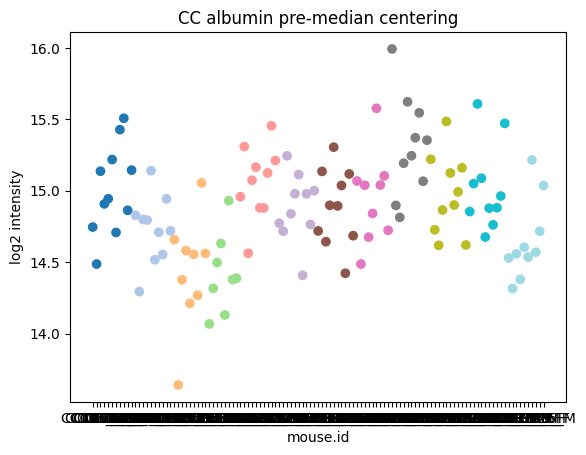

In [ ]:
import matplotlib.pyplot as plt

# Get unique batches
unique_batches = cc_alb['Batch'].unique()

# Define a color map for batches
colors = plt.cm.get_cmap('tab20', len(unique_batches))

# Create a dictionary to map batches to colors
batch_color_mapping = {batch: colors(i) for i, batch in enumerate(unique_batches)}

# Assign colors based on the 'Batch' column
cc_alb['Color'] = cc_alb['Batch'].map(batch_color_mapping)

# Remove rows with missing values in the 'Color' column
cc_alb = cc_alb.dropna(subset=['Color'])

# Create the scatter plot with colored batches
plt.scatter(x=cc_alb['mouse.id'], y=cc_alb['Intensity'], c=cc_alb['Color'])

plt.xlabel('mouse.id')
plt.ylabel('log2 intensity')
plt.title('CC albumin pre-median centering')
plt.show()


<ipython-input-8-e115b96623b7>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_batches))
<ipython-input-8-e115b96623b7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  do_alb['Color'] = do_alb['Batch'].map(batch_color_mapping)


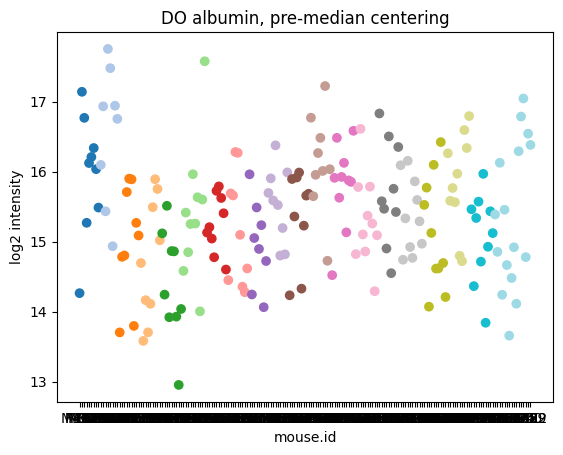

In [ ]:
import matplotlib.pyplot as plt

# Get unique batches
unique_batches = do_alb['Batch'].unique()

# Define a color map for batches
colors = plt.cm.get_cmap('tab20', len(unique_batches))

# Create a dictionary to map batches to colors
batch_color_mapping = {batch: colors(i) for i, batch in enumerate(unique_batches)}

# Assign colors based on the 'Batch' column
do_alb['Color'] = do_alb['Batch'].map(batch_color_mapping)

# Remove rows with missing values in the 'Color' column
do_alb = do_alb.dropna(subset=['Color'])

# Create the scatter plot with colored batches
plt.scatter(x=do_alb['mouse.id'], y=do_alb['Intensity'], c=do_alb['Color'])

plt.xlabel('mouse.id')
plt.ylabel('log2 intensity')
plt.title('DO albumin, pre-median centering')
plt.show()


# LOESS curve-smoothing (optional)

In [ ]:
# Skipping this step because Mol. Systems Biology paper said TMT mouse data could be corrected with simple median-centering

# Median-centering (normalization)

In [ ]:
# TODO: fix so it adjusts by the global median which should be the same across datasets
def get_global_medians(df, intensity_colname='Intensity', sample_colname='mouse.id'):
  # Assuming your dataframe is named df

  # Group the dataframe by mouse.id
  grouped = df.groupby(sample_colname)

  # Calculate the median protein abundance for each mouse
  median_abundance = grouped[intensity_colname].median()

  # Calculate the mean of medians across all samples
  mean_median_abundance = median_abundance.mean()

  # Create a new dataframe to store the results
  result_df = pd.DataFrame({sample_colname: median_abundance.index, 'median_abundance': median_abundance.values})

  # Print the resulting dataframe
  return mean_median_abundance, result_df

In [ ]:
def median_center(df, mean_median_abundance, median_abundance, intensity_colname='Intensity', medians_colname='median_abundance', center_colname='centered_Intensity'):
    # Multiply by this ratio
    df[center_colname] = df[intensity_colname].values * median_abundance[medians_colname].values / mean_median_abundance

    # Subtract the sample-specific median from each peptide intensity
    df[center_colname] = df[center_colname].values - median_abundance[medians_colname].values

    return df

In [ ]:
do_proteins

,protein.id,sample.id,symbol,Intensity,Batch,tag,mouse.id,Sex,Diet
0,ENSMUSP00000000001,S00~126,Gnai3,9.586546,S00,126,M411,M,HF
1,ENSMUSP00000000001,S00~127c,Gnai3,9.593999,S00,127c,F367,F,HF
2,ENSMUSP00000000001,S00~127n,Gnai3,9.494624,S00,127n,M365,M,HF
3,ENSMUSP00000000001,S00~128c,Gnai3,10.099670,S00,128c,M327,M,chow
4,ENSMUSP00000000001,S00~129c,Gnai3,9.386850,S00,129c,M409,M,HF
...,...,...,...,...,...,...,...,...,...
1644283,ENSMUSP00000139372,S20~128c,Hnrnpll,11.474839,S20,128c,F368,F,HF
1644284,ENSMUSP00000139372,S20~128n,Hnrnpll,11.302644,S20,128n,F411,F,HF
1644285,ENSMUSP00000139372,S20~130c,Hnrnpll,11.352494,S20,130c,F400,F,chow
1644286,ENSMUSP00000139372,S20~130n,Hnrnpll,11.062345,S20,130n,M359,M,HF


In [ ]:
do_alb = do_proteins[do_proteins['symbol'] == 'Alb']
cc_alb = cc_proteins[cc_proteins['symbol'] == 'Alb']

cc_alb = cc_alb[~cc_alb['mouse.id'].duplicated()]

do_global_mean, do_global_medians = get_global_medians(do_proteins)
cc_global_mean, cc_global_medians = get_global_medians(cc_proteins)

print('DO per sample global medians:', do_global_mean, do_global_medians)
print('CC per sample global medians:', cc_global_mean, cc_global_medians)

DO per sample global medians: 10.05463692924825     mouse.id  median_abundance
0       F326         10.555873
1       F327         10.498530
2       F328          9.702558
3       F329          9.779648
4       F330         10.140543
..       ...               ...
187     M421         10.495254
188     M422          9.604146
189     M423          9.722406
190     M424          9.643998
191     M425          9.279447

[192 rows x 2 columns]
CC per sample global medians: 9.335008222464673     mouse.id  median_abundance
0    CC001_F          9.515069
1    CC001_M          9.337719
2    CC002_F          9.522540
3    CC002_M          9.435778
4    CC003_F          9.028034
..       ...               ...
112  CC081_F          9.301516
113  CC081_M          9.229498
114  CC082_F          9.725147
115  CC082_M          9.299978
116    NA_NA          9.456103

[117 rows x 2 columns]


In [ ]:
do_global_medians['median_abundance']

0      10.555873
1      10.498530
2       9.702558
3       9.779648
4      10.140543
         ...    
187    10.495254
188     9.604146
189     9.722406
190     9.643998
191     9.279447
Name: median_abundance, Length: 192, dtype: float64

In [ ]:
# Perform median center
do_alb_centered = median_center(do_alb, do_global_mean, do_global_medians)
cc_alb_centered = median_center(cc_alb, cc_global_mean, cc_global_medians)

<ipython-input-11-4db7bbd8373f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[center_colname] = df[intensity_colname].values * median_abundance[medians_colname].values / mean_median_abundance
<ipython-input-11-4db7bbd8373f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[center_colname] = df[center_colname].values - median_abundance[medians_colname].values


In [ ]:
do_alb_centered

,protein.id,sample.id,symbol,Intensity,Batch,tag,mouse.id,Sex,Diet,centered_Intensity
462528,ENSMUSP00000031314,S00~126,Alb,14.263248,S00,126,M411,M,HF,4.418416
462529,ENSMUSP00000031314,S00~127c,Alb,17.140993,S00,127c,F367,F,HF,7.399205
462530,ENSMUSP00000031314,S00~127n,Alb,16.768651,S00,127n,M365,M,HF,6.478913
462531,ENSMUSP00000031314,S00~128c,Alb,15.268607,S00,128c,M327,M,chow,5.071371
462532,ENSMUSP00000031314,S00~129c,Alb,16.123003,S00,129c,M409,M,HF,6.120214
...,...,...,...,...,...,...,...,...,...,...
462715,ENSMUSP00000031314,S20~128c,Alb,16.787370,S20,128c,F368,F,HF,7.027777
462716,ENSMUSP00000031314,S20~128n,Alb,17.045348,S20,128n,F411,F,HF,6.677497
462717,ENSMUSP00000031314,S20~130c,Alb,14.778370,S20,130c,F400,F,chow,4.567649
462718,ENSMUSP00000031314,S20~130n,Alb,16.542348,S20,130n,M359,M,HF,6.222748


In [ ]:
cc_alb_centered

,protein.id,sample.id,symbol,Intensity,Batch,tag,strain,Sex,mouse.id,centered_Intensity
283125,ENSMUSP00000031314,TMT1~126,Alb,14.745931,TMT1,126,CC004,M,CC004_M,5.515293
283126,ENSMUSP00000031314,TMT1~127c,Alb,14.486740,TMT1,127c,CC042,M,CC042_M,5.153228
283127,ENSMUSP00000031314,TMT1~127n,Alb,15.137120,TMT1,127n,CC057,F,CC057_F,5.918671
283128,ENSMUSP00000031314,TMT1~128c,Alb,14.907900,TMT1,128c,CC002,M,CC002_M,5.633051
283129,ENSMUSP00000031314,TMT1~128n,Alb,14.943935,TMT1,128n,CC013,M,CC013_M,5.424482
...,...,...,...,...,...,...,...,...,...,...
283244,ENSMUSP00000031314,TMT9~129c,Alb,14.535633,TMT9,129c,CC029,M,CC029_M,5.181966
283245,ENSMUSP00000031314,TMT9~129n,Alb,15.216376,TMT9,129n,CC071,F,CC071_F,5.814893
283246,ENSMUSP00000031314,TMT9~130c,Alb,14.569429,TMT9,130c,CC043,F,CC043_F,5.453184
283247,ENSMUSP00000031314,TMT9~130n,Alb,14.716077,TMT9,130n,CC026,F,CC026_F,5.360876


In [ ]:
cc_alb['centered_Intensity'].describe()

count    117.000000
mean       5.535800
std        0.375998
min        4.285167
25%        5.298035
50%        5.539982
75%        5.793570
max        6.605778
Name: centered_Intensity, dtype: float64

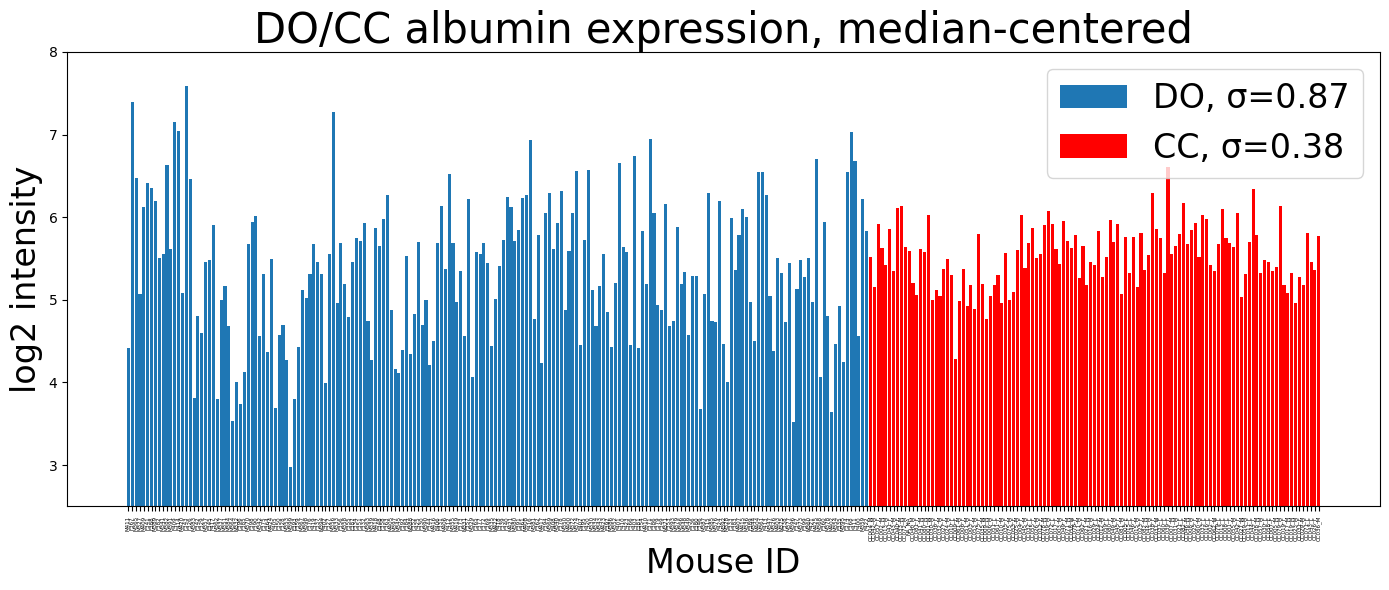

In [ ]:
from matplotlib import pyplot as plt

def plot_shared_bar(do_data, cc_data, xlabel, ylabel, title):
    fig, ax = plt.subplots(figsize=(14, 6))
    sigma_symbol = '\u03C3'

    # Create the first bar plot
    do_std = do_data['centered_Intensity'].std()
    ax.bar(do_data['mouse.id'], do_data['centered_Intensity'], label=f'DO, {sigma_symbol}={do_std:.2f}')

    # Create the second bar plot over the first one
    cc_std = cc_data['centered_Intensity'].std()
    ax.bar(cc_data['mouse.id'], cc_data['centered_Intensity'], color='red', label=f'CC, {sigma_symbol}={cc_std:.2f}')

    # Add labels and title
    ax.set_xlabel(xlabel, fontsize=24)
    ax.set_ylabel(ylabel, fontsize=24)
    ax.set_title(title, fontsize=30)

    ax.tick_params(axis='x', rotation=90, labelsize=4)
    ax.set_ylim(2.5, 8)  # You can uncomment this line to set the y-axis limits

    # Add legend
    ax.legend(fontsize=24)

    plt.tight_layout()
    plt.show()

# Example usage:
plot_shared_bar(do_alb_centered, cc_alb_centered, 'Mouse ID', 'log2 intensity', 'DO/CC albumin expression, median-centered')

<ipython-input-20-c84b11be5c79>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_batches))


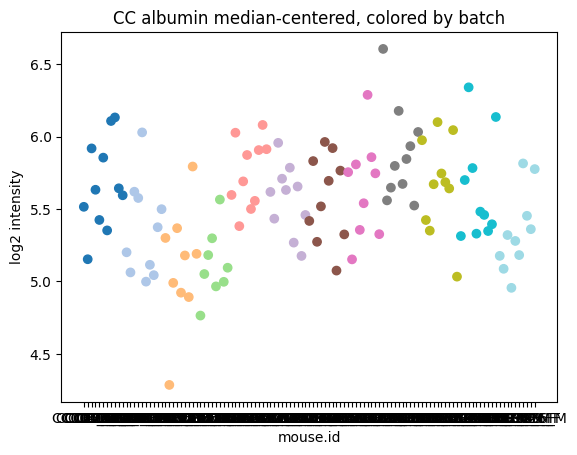

In [ ]:
import matplotlib.pyplot as plt

# Get unique batches
unique_batches = cc_alb_centered['Batch'].unique()

# Define a color map for batches
colors = plt.cm.get_cmap('tab20', len(unique_batches))

# Create a dictionary to map batches to colors
batch_color_mapping = {batch: colors(i) for i, batch in enumerate(unique_batches)}

# Assign colors based on the 'Batch' column
cc_alb_centered['Color'] = cc_alb_centered['Batch'].map(batch_color_mapping)

# Remove rows with missing values in the 'Color' column
cc_alb_centered = cc_alb_centered.dropna(subset=['Color'])

# Create the scatter plot with colored batches
plt.scatter(x=cc_alb_centered['mouse.id'], y=cc_alb_centered['centered_Intensity'], c=cc_alb_centered['Color'])

plt.xlabel('mouse.id')
plt.ylabel('log2 intensity')
plt.title('CC albumin median-centered, colored by batch')
plt.show()


<ipython-input-21-2f339f8af742>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab20', len(unique_batches))
<ipython-input-21-2f339f8af742>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  do_alb_centered['Color'] = do_alb_centered['Batch'].map(batch_color_mapping)


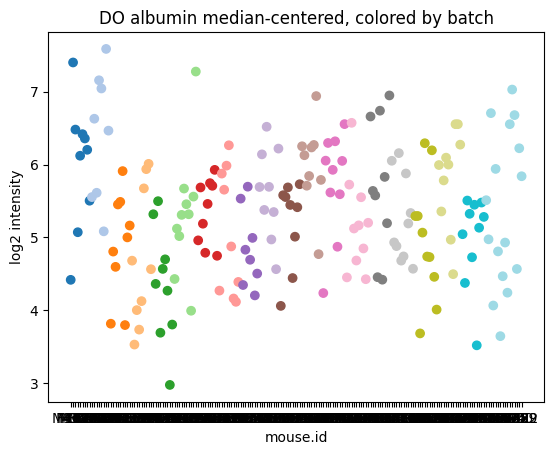

In [ ]:
import matplotlib.pyplot as plt

# Get unique batches
unique_batches = do_alb_centered['Batch'].unique()

# Define a color map for batches
colors = plt.cm.get_cmap('tab20', len(unique_batches))

# Create a dictionary to map batches to colors
batch_color_mapping = {batch: colors(i) for i, batch in enumerate(unique_batches)}

# Assign colors based on the 'Batch' column
do_alb_centered['Color'] = do_alb_centered['Batch'].map(batch_color_mapping)

# Remove rows with missing values in the 'Color' column
do_alb_centered = do_alb_centered.dropna(subset=['Color'])

# Create the scatter plot with colored batches
plt.scatter(x=do_alb_centered['mouse.id'], y=do_alb_centered['centered_Intensity'], c=do_alb_centered['Color'])

plt.xlabel('mouse.id')
plt.ylabel('log2 intensity')
plt.title('DO albumin median-centered, colored by batch')
plt.show()


In [ ]:
do_alb_centered.describe()

,Intensity,centered_Intensity
count,192.000000,192.000000
mean,15.395250,5.336873
std,0.863995,0.872372
min,12.951466,2.977416
25%,14.793370,4.698099
50%,15.433131,5.366640
75%,15.962095,5.937152
max,17.753959,7.584944


In [ ]:
cc_alb_centered.describe()

,Intensity,centered_Intensity
count,117.000000,117.000000
mean,14.871790,5.535800
std,0.372069,0.375998
min,13.639888,4.285167
25%,14.620164,5.298035
50%,14.879454,5.539982
75%,15.117972,5.793570
max,15.993715,6.605778


## Transcriptomics

In [ ]:
# CC mice expression
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE199nnn/GSE199702/suppl/GSE199702%5Fliver%5Ftotal%5Fgene%5Fcounts%2Etxt%2Egz
# DO mice expression
!wget https://ftp.ncbi.nlm.nih.gov/geo/series/GSE72nnn/GSE72759/suppl/GSE72759%5FDO192%5FRNAseq%5FUpperQuartileNormalized%5Fn21454genes%5FforGEOSubmission%2Etxt%2Egz

--2023-11-08 00:12:53--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE199nnn/GSE199702/suppl/GSE199702%5Fliver%5Ftotal%5Fgene%5Fcounts%2Etxt%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7679302 (7.3M) [application/x-gzip]
Saving to: ‘GSE199702_liver_total_gene_counts.txt.gz’

GSE199702_liver_tot 100%[===================>]   7.32M  13.9MB/s    in 0.5s    

2023-11-08 00:12:54 (13.9 MB/s) - ‘GSE199702_liver_total_gene_counts.txt.gz’ saved [7679302/7679302]

--2023-11-08 00:12:54--  https://ftp.ncbi.nlm.nih.gov/geo/series/GSE72nnn/GSE72759/suppl/GSE72759%5FDO192%5FRNAseq%5FUpperQuartileNormalized%5Fn21454genes%5FforGEOSubmission%2Etxt%2Egz
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.12, 130.14.250.13, 2607:f220:41e:250::7, ...
Connecting to ftp.ncbi.nl

In [ ]:
!gunzip GSE199702_liver_total_gene_counts.txt.gz
!gunzip GSE72759_DO192_RNAseq_UpperQuartileNormalized_n21454genes_forGEOSubmission.txt.gz

In [ ]:
cc_exp = pd.read_table('GSE199702_liver_total_gene_counts.txt')
cc_exp

<ipython-input-26-cfd1975bf3bd>:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116) have mixed types. Specify dtype option on import or set low_memory=False.
  cc_exp = pd.read_table('GSE199702_liver_total_gene_counts.txt')


,sample.id,Liver_CC001_F,Liver_CC001_M,Liver_CC002_F,Liver_CC002_M,Liver_CC003_F,Liver_CC003_M,Liver_CC004_F,Liver_CC004_M,Liver_CC005_F,...,Liver_CC078_F,Liver_CC078_M,Liver_CC079_F,Liver_CC079_M,Liver_CC080_F,Liver_CC080_M,Liver_CC081_F,Liver_CC081_M,Liver_CC082_F,Liver_CC082_M
0,mouse.id,CC001_F,CC001_M,CC002_F,CC002_M,CC003_F,CC003_M,CC004_F,CC004_M,CC005_F,...,CC078_F,CC078_M,CC079_F,CC079_M,CC080_F,CC080_M,CC081_F,CC081_M,CC082_F,CC082_M
1,Sex,F,M,F,M,F,M,F,M,F,...,F,M,F,M,F,M,F,M,F,M
2,strain,CC001,CC001,CC002,CC002,CC003,CC003,CC004,CC004,CC005,...,CC078,CC078,CC079,CC079,CC080,CC080,CC081,CC081,CC082,CC082
3,ENSMUSG00000000001,2564,2490,3292,1910,2074,3728,2479,2053,2094,...,2724,2138,478,1411,2566,2121,2432,2010,2033,2758
4,ENSMUSG00000000028,30,54,16,7,30,29,18,18,24,...,16,18,10,36,29,28,30,22,45,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19803,ENSMUSG00000109559,11.0,0.0,9.0,5.0,6.0,4.0,6.0,4.0,6.0,...,4.0,5.0,0.0,4.0,8.0,9.0,3.0,3.0,1.0,8.0
19804,ENSMUSG00000109561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,4.0,8.0,4.0,7.0,0.0,0.0,0.0,5.0,0.0
19805,ENSMUSG00000109563,0.5,1.5,0.0,1.5,3.0,2.5,1.5,1.5,1.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.5
19806,ENSMUSG00000109564,26.0,27.0,6.0,5.0,30.0,13.0,2.0,7.0,11.0,...,17.0,4.0,5.0,9.0,13.0,13.0,15.0,8.0,16.0,16.0


In [ ]:
do_exp = pd.read_table('GSE72759_DO192_RNAseq_UpperQuartileNormalized_n21454genes_forGEOSubmission.txt')
do_exp

,Unnamed: 0,F326,F327,F328,F329,F330,F331,F332,F333,F334,...,M416,M417,M418,M419,M420,M421,M422,M423,M424,M425
0,ENSMUSG00000090025,0.0145,0.0000,0.0667,0.0149,0.0000,0.0000,0.0000,0.0500,0.0317,...,0.0807,0.0519,0.0000,0.0566,0.0000,0.0000,0.0187,0.0179,0.0627,0.0386
1,ENSMUSG00000051951,0.0000,0.0000,0.0267,0.0000,0.0129,0.0000,0.0000,0.0333,0.0159,...,0.0000,0.0000,0.0217,0.0000,0.0000,0.0465,0.0000,0.0000,0.0169,0.0482
2,ENSMUSG00000025902,0.4928,0.2930,0.5067,0.3134,0.4133,0.5714,0.4308,0.5000,0.4286,...,0.3158,0.5370,0.5000,0.1509,0.2532,0.1707,0.5467,0.3036,0.2541,0.4578
3,ENSMUSG00000098104,0.0145,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0189,0.0000,0.0155,0.0000,0.0000,0.0000,0.0000
4,ENSMUSG00000033845,11.3478,8.2895,10.5467,11.0448,10.0226,10.8254,13.2308,10.2167,11.2381,...,10.6491,9.8148,8.5870,12.6226,8.9367,6.4856,9.3467,8.9464,9.4028,6.1687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21449,ENSMUSG00000035299,5.2362,1.4425,1.0267,1.3537,1.2528,1.8413,1.6446,1.1000,1.5222,...,1.2772,11.0981,1.1391,0.8453,0.6797,2.0357,1.4680,1.0696,1.3520,1.4783
21450,ENSMUSG00000072844,0.5333,0.4567,0.2013,0.3940,0.1369,0.3619,0.3123,0.2017,0.6079,...,0.3281,0.2148,0.3304,0.2057,0.1975,0.6268,0.6853,0.0643,0.3134,0.4096
21451,ENSMUSG00000087263,0.0159,0.0224,0.0000,0.0343,0.0000,0.0000,0.0169,0.0000,0.0175,...,0.0000,0.0185,0.0652,0.0000,0.0253,0.0590,0.0347,0.0000,0.0203,0.0000
21452,ENSMUSG00000086695,0.0290,0.0000,0.0000,0.0000,0.0129,0.0000,0.0154,0.0333,0.0794,...,0.0526,0.0370,0.0000,0.0000,0.0000,0.0155,0.0267,0.0000,0.0339,0.0120


In [ ]:
do_exp.isna().sum().sum()

0

In [ ]:
do_exp = do_exp.set_index('Unnamed: 0')
do_exp = do_exp.rename_axis('gene')
do_exp

,F326,F327,F328,F329,F330,F331,F332,F333,F334,F335,...,M416,M417,M418,M419,M420,M421,M422,M423,M424,M425
gene,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000090025,0.0145,0.0000,0.0667,0.0149,0.0000,0.0000,0.0000,0.0500,0.0317,0.0145,...,0.0807,0.0519,0.0000,0.0566,0.0000,0.0000,0.0187,0.0179,0.0627,0.0386
ENSMUSG00000051951,0.0000,0.0000,0.0267,0.0000,0.0129,0.0000,0.0000,0.0333,0.0159,0.0000,...,0.0000,0.0000,0.0217,0.0000,0.0000,0.0465,0.0000,0.0000,0.0169,0.0482
ENSMUSG00000025902,0.4928,0.2930,0.5067,0.3134,0.4133,0.5714,0.4308,0.5000,0.4286,0.4058,...,0.3158,0.5370,0.5000,0.1509,0.2532,0.1707,0.5467,0.3036,0.2541,0.4578
ENSMUSG00000098104,0.0145,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0189,0.0000,0.0155,0.0000,0.0000,0.0000,0.0000
ENSMUSG00000033845,11.3478,8.2895,10.5467,11.0448,10.0226,10.8254,13.2308,10.2167,11.2381,10.7101,...,10.6491,9.8148,8.5870,12.6226,8.9367,6.4856,9.3467,8.9464,9.4028,6.1687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000035299,5.2362,1.4425,1.0267,1.3537,1.2528,1.8413,1.6446,1.1000,1.5222,1.2014,...,1.2772,11.0981,1.1391,0.8453,0.6797,2.0357,1.4680,1.0696,1.3520,1.4783
ENSMUSG00000072844,0.5333,0.4567,0.2013,0.3940,0.1369,0.3619,0.3123,0.2017,0.6079,0.2913,...,0.3281,0.2148,0.3304,0.2057,0.1975,0.6268,0.6853,0.0643,0.3134,0.4096
ENSMUSG00000087263,0.0159,0.0224,0.0000,0.0343,0.0000,0.0000,0.0169,0.0000,0.0175,0.0304,...,0.0000,0.0185,0.0652,0.0000,0.0253,0.0590,0.0347,0.0000,0.0203,0.0000


In [ ]:
cc_exp.columns = cc_exp.iloc[0].tolist()
cc_exp = cc_exp.iloc[3:,:]
cc_exp = cc_exp.set_index('mouse.id')
cc_exp = cc_exp.rename_axis('gene')
cc_exp

,CC001_F,CC001_M,CC002_F,CC002_M,CC003_F,CC003_M,CC004_F,CC004_M,CC005_F,CC005_M,...,CC078_F,CC078_M,CC079_F,CC079_M,CC080_F,CC080_M,CC081_F,CC081_M,CC082_F,CC082_M
gene,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,2564,2490,3292,1910,2074,3728,2479,2053,2094,2109,...,2724,2138,478,1411,2566,2121,2432,2010,2033,2758
ENSMUSG00000000028,30,54,16,7,30,29,18,18,24,16,...,16,18,10,36,29,28,30,22,45,32
ENSMUSG00000000031,29,16,233,93,789,3,17,2,21,9,...,32,75,329,83,63,15,23,5,66,4
ENSMUSG00000000037,0,2,3,0,1,0,0,0,6,1,...,1,4,1,1,10,5,0,0,8,1
ENSMUSG00000000049,57658,46342,51940,38782,52752,94025,50255,50606,40068,49945,...,55394,49630,31830,49592,42905,46905,48681,39553,44466,55225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000109559,11.0,0.0,9.0,5.0,6.0,4.0,6.0,4.0,6.0,3.0,...,4.0,5.0,0.0,4.0,8.0,9.0,3.0,3.0,1.0,8.0
ENSMUSG00000109561,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,4.0,8.0,4.0,7.0,0.0,0.0,0.0,5.0,0.0
ENSMUSG00000109563,0.5,1.5,0.0,1.5,3.0,2.5,1.5,1.5,1.0,0.0,...,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.5


In [ ]:
cc_exp = cc_exp.astype(float)

In [ ]:
import pandas as pd
import numpy as np

def cpm_normalization(counts_df):
    """
    Perform counts per million normalization on RNA-Seq count data.

    Args:
        counts_df (pd.DataFrame): DataFrame of count data (genes as rows, samples as columns).

    Returns:
        pd.DataFrame: Normalized count data.
    """

    cpm = (counts_df / counts_df.sum()) * 1e6
    normalized_counts = np.log2(cpm + 1)

    return normalized_counts

In [ ]:
cc_exp = cpm_normalization(cc_exp)

In [ ]:
cc_exp

,CC001_F,CC001_M,CC002_F,CC002_M,CC003_F,CC003_M,CC004_F,CC004_M,CC005_F,CC005_M,...,CC078_F,CC078_M,CC079_F,CC079_M,CC080_F,CC080_M,CC081_F,CC081_M,CC082_F,CC082_M
gene,,,,,,,,,,,,,,,,,,,,,
ENSMUSG00000000001,6.514237,6.560198,6.928461,6.633889,6.504577,6.436828,6.608761,6.315984,6.657713,6.456576,...,6.809541,6.537103,5.255306,5.901521,6.696489,6.402761,6.623266,6.556042,6.483871,6.600629
ENSMUSG00000000028,1.041108,1.596844,0.666445,0.443929,1.200943,0.736500,0.766712,0.756819,1.101470,0.730060,...,0.725069,0.826551,0.830365,1.321713,1.111602,1.072974,1.139952,1.013603,1.565112,1.080255
ENSMUSG00000000031,1.016173,0.678021,3.255574,2.532790,5.135906,0.096140,0.733287,0.106536,1.001813,0.454727,...,1.205367,2.078156,4.733389,2.156227,1.816336,0.670209,0.943257,0.300509,1.953528,0.188149
ENSMUSG00000000037,0.000000,0.104327,0.150679,0.000000,0.061149,0.000000,0.000000,0.000000,0.363376,0.058205,...,0.057708,0.228820,0.108108,0.058879,0.485730,0.259545,0.000000,0.000000,0.431107,0.049387
ENSMUSG00000000049,10.990129,10.763761,10.897135,10.963754,11.157969,11.077317,10.936076,10.922008,10.902224,11.006466,...,11.143191,11.059039,11.274846,11.013198,10.746904,10.853314,10.932439,10.839934,10.919427,10.910063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSMUSG00000109559,0.472865,0.000000,0.411726,0.330398,0.333172,0.126814,0.303104,0.205743,0.363376,0.168010,...,0.218155,0.280772,0.000000,0.222341,0.400795,0.438061,0.163980,0.187701,0.061477,0.354568
ENSMUSG00000109561,0.000000,0.000000,0.000000,0.072410,0.000000,0.000000,0.000000,0.054251,0.000000,0.000000,...,0.057708,0.228820,0.698226,0.222341,0.356376,0.000000,0.000000,0.000000,0.284120,0.000000
ENSMUSG00000109563,0.025213,0.078944,0.000000,0.107297,0.176182,0.080555,0.081952,0.080631,0.067279,0.000000,...,0.000000,0.000000,0.000000,0.029740,0.000000,0.000000,0.000000,0.033029,0.031066,0.024905


In [ ]:
!pip install biomart
import biomart

def get_ensembl_mappings():
    # Set up connection to server
    server = biomart.BiomartServer('http://useast.ensembl.org/biomart')
    mart = server.datasets['mmusculus_gene_ensembl']

    # List the types of data we want
    attributes = ['ensembl_gene_id', 'mgi_symbol', 'uniprot_gn_symbol']

    # Get the mapping between the attributes
    response = mart.search({'attributes': attributes})
    data = response.raw.data.decode('ascii')

    ensembl_to_mgi = {}
    ensembl_to_uniprot = {}

    # Store the data in a dict
    for line in data.splitlines():
        line = line.split('\t')
        # The entries are in the same order as in the `attributes` variable
        ensembl_gene = line[0]
        mgi = line[1]
        uniprot = line[2]

        # Some of these keys may be an empty string. If you want, you can
        # avoid having a '' key in your dict by ensuring the
        # transcript/gene/peptide ids have a nonzero length before
        # adding them to the dict
        ensembl_to_mgi[ensembl_gene] = mgi
        ensembl_to_uniprot[ensembl_gene] = uniprot

    return ensembl_to_mgi, ensembl_to_uniprot

In [ ]:
ensembl_to_genesymbol, ensembl_to_uniprot = get_ensembl_mappings()

In [ ]:
cc_exp = cc_exp[cc_exp.index.isin(ensembl_to_genesymbol)]
cc_exp.index = [ensembl_to_genesymbol[gene] for gene in list(cc_exp.index.values) if gene in ensembl_to_genesymbol]
cc_exp

,CC001_F,CC001_M,CC002_F,CC002_M,CC003_F,CC003_M,CC004_F,CC004_M,CC005_F,CC005_M,...,CC078_F,CC078_M,CC079_F,CC079_M,CC080_F,CC080_M,CC081_F,CC081_M,CC082_F,CC082_M
Gnai3,6.514237,6.560198,6.928461,6.633889,6.504577,6.436828,6.608761,6.315984,6.657713,6.456576,...,6.809541,6.537103,5.255306,5.901521,6.696489,6.402761,6.623266,6.556042,6.483871,6.600629
Cdc45,1.041108,1.596844,0.666445,0.443929,1.200943,0.736500,0.766712,0.756819,1.101470,0.730060,...,0.725069,0.826551,0.830365,1.321713,1.111602,1.072974,1.139952,1.013603,1.565112,1.080255
H19,1.016173,0.678021,3.255574,2.532790,5.135906,0.096140,0.733287,0.106536,1.001813,0.454727,...,1.205367,2.078156,4.733389,2.156227,1.816336,0.670209,0.943257,0.300509,1.953528,0.188149
Scml2,0.000000,0.104327,0.150679,0.000000,0.061149,0.000000,0.000000,0.000000,0.363376,0.058205,...,0.057708,0.228820,0.108108,0.058879,0.485730,0.259545,0.000000,0.000000,0.431107,0.049387
Apoh,10.990129,10.763761,10.897135,10.963754,11.157969,11.077317,10.936076,10.922008,10.902224,11.006466,...,11.143191,11.059039,11.274846,11.013198,10.746904,10.853314,10.932439,10.839934,10.919427,10.910063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Gm44891,0.938675,0.643807,1.281667,1.021082,1.058258,0.696162,0.799381,1.227250,0.967004,0.765431,...,0.955059,0.894821,1.703363,1.115285,1.334064,0.634020,0.784288,0.454730,1.062353,1.007148
Gm34280,0.472865,0.000000,0.411726,0.330398,0.333172,0.126814,0.303104,0.205743,0.363376,0.168010,...,0.218155,0.280772,0.000000,0.222341,0.400795,0.438061,0.163980,0.187701,0.061477,0.354568
Ankrd31,0.000000,0.000000,0.000000,0.072410,0.000000,0.000000,0.000000,0.054251,0.000000,0.000000,...,0.057708,0.228820,0.698226,0.222341,0.356376,0.000000,0.000000,0.000000,0.284120,0.000000
Muc16,0.938675,1.008920,0.287099,0.330398,1.200943,0.376968,0.108266,0.342828,0.608929,0.000000,...,0.760256,0.228820,0.474117,0.459334,0.604435,0.596900,0.679755,0.454730,0.762591,0.638959


In [ ]:
do_exp = do_exp[do_exp.index.isin(ensembl_to_genesymbol)]
do_exp.index = [ensembl_to_genesymbol[gene] for gene in list(do_exp.index.values) if gene in ensembl_to_genesymbol]
do_exp

,F326,F327,F328,F329,F330,F331,F332,F333,F334,F335,...,M416,M417,M418,M419,M420,M421,M422,M423,M424,M425
Xkr4,0.0000,0.0000,0.0267,0.0000,0.0129,0.0000,0.0000,0.0333,0.0159,0.0000,...,0.0000,0.0000,0.0217,0.0000,0.0000,0.0465,0.0000,0.0000,0.0169,0.0482
Sox17,0.4928,0.2930,0.5067,0.3134,0.4133,0.5714,0.4308,0.5000,0.4286,0.4058,...,0.3158,0.5370,0.5000,0.1509,0.2532,0.1707,0.5467,0.3036,0.2541,0.4578
Gm6085,0.0145,0.0000,0.0133,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0189,0.0000,0.0155,0.0000,0.0000,0.0000,0.0000
Mrpl15,11.3478,8.2895,10.5467,11.0448,10.0226,10.8254,13.2308,10.2167,11.2381,10.7101,...,10.6491,9.8148,8.5870,12.6226,8.9367,6.4856,9.3467,8.9464,9.4028,6.1687
Lypla1,30.5449,40.2154,36.7133,39.1090,35.1088,38.0063,40.4769,37.7417,39.7254,41.5710,...,42.2947,38.6111,33.6717,37.0509,30.1241,31.0954,40.7453,35.7786,38.5074,26.1181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Mid1,5.2362,1.4425,1.0267,1.3537,1.2528,1.8413,1.6446,1.1000,1.5222,1.2014,...,1.2772,11.0981,1.1391,0.8453,0.6797,2.0357,1.4680,1.0696,1.3520,1.4783
G530011O06Rik,0.5333,0.4567,0.2013,0.3940,0.1369,0.3619,0.3123,0.2017,0.6079,0.2913,...,0.3281,0.2148,0.3304,0.2057,0.1975,0.6268,0.6853,0.0643,0.3134,0.4096
Gm15726,0.0159,0.0224,0.0000,0.0343,0.0000,0.0000,0.0169,0.0000,0.0175,0.0304,...,0.0000,0.0185,0.0652,0.0000,0.0253,0.0590,0.0347,0.0000,0.0203,0.0000
Gm15247,0.0290,0.0000,0.0000,0.0000,0.0129,0.0000,0.0154,0.0333,0.0794,0.0145,...,0.0526,0.0370,0.0000,0.0000,0.0000,0.0155,0.0267,0.0000,0.0339,0.0120


In [ ]:
cc_exp = cc_exp[~cc_exp.index.duplicated()]
do_exp = do_exp[~do_exp.index.duplicated()]

In [ ]:
cc_exp = cc_exp.transpose()
do_exp = do_exp.transpose()
cc_exp

,Gnai3,Cdc45,H19,Scml2,Apoh,Narf,Cav2,Klf6,Scmh1,Cox5a,...,Nup62,Gm6882,Gdf1,9330162G02Rik,Gm44667,Gm44891,Gm34280,Ankrd31,Muc16,Gm44624
CC001_F,6.514237,1.041108,1.016173,0.000000,10.990129,5.649272,2.211575,3.461255,3.559447,6.643905,...,3.920232,0.578836,0.058300,0.518891,0.645392,0.938675,0.472865,0.00000,0.938675,0.000000
CC001_M,6.560198,1.596844,0.678021,0.104327,10.763761,5.935031,2.768068,3.490125,3.565168,6.609596,...,3.513998,1.087391,0.000000,0.714537,0.961399,0.643807,0.000000,0.00000,1.008920,0.054602
CC002_F,6.928461,0.666445,3.255574,0.150679,10.897135,6.207130,1.662271,3.387903,3.352057,6.819489,...,4.218373,1.366245,0.246842,0.636292,0.489205,1.281667,0.411726,0.00000,0.287099,0.000000
CC002_M,6.633889,0.443929,2.532790,0.000000,10.963754,5.613883,2.102392,3.141391,3.270125,6.906154,...,4.361724,0.549174,0.000000,0.699055,0.330398,1.021082,0.330398,0.07241,0.330398,0.000000
CC003_F,6.504577,1.200943,5.135906,0.061149,11.157969,5.449247,1.898281,4.504088,3.459632,6.780955,...,3.558374,0.474742,0.129480,1.478640,0.721985,1.058258,0.333172,0.00000,1.200943,0.064885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC080_M,6.402761,1.072974,0.670209,0.259545,10.853314,6.280061,2.094871,2.952493,3.617555,6.826973,...,2.713311,0.161257,0.259545,1.107824,0.811678,0.634020,0.438061,0.00000,0.596900,0.058696
CC081_F,6.623266,1.139952,0.943257,0.000000,10.932439,6.561480,1.882973,3.579422,3.584256,6.792516,...,3.963967,0.000000,0.111364,0.824113,0.527699,0.784288,0.163980,0.00000,0.679755,0.377375
CC081_M,6.556042,1.013603,0.300509,0.000000,10.839934,6.613811,1.826749,3.056218,3.306354,6.676477,...,3.642276,0.353769,0.000000,0.999152,0.800993,0.454730,0.187701,0.00000,0.454730,0.000000
CC082_F,6.483871,1.565112,1.953528,0.431107,10.919427,5.665583,2.754120,3.702128,3.870459,6.575414,...,3.853180,0.869583,0.000000,0.877337,0.903501,1.062353,0.061477,0.28412,0.762591,0.000000


In [ ]:
cgenes = list(set(cc_exp.columns.values).intersection(do_exp.columns.values))

In [ ]:
do_exp = do_exp[cgenes]

In [ ]:
cc_exp = cc_exp[cgenes]

In [ ]:
# Quantile discretization -- skip this for now as we will use pearson's r as evaluation metric

'''
def quantile_discretize(prot_exp, q=4):
  return pd.qcut(prot_exp, q=q)

do_alb_binned = quantile_discretize(do_alb['centered_Intensity'])
cc_alb_binned = pd.cut(cc_alb['centered_Intensity'], bins=do_alb_binned.cat.categories, include_lowest=True)

cc_alb_binned = cc_alb_binned.cat.codes
do_alb_binned = do_alb_binned.cat.codes

cc_alb_binned.index = cc_alb_centered['mouse.id']
do_alb_binned.index = do_alb_centered['mouse.id']

cc_alb_binned = cc_alb_binned[~cc_alb_binned.index.duplicated()]

cc_exp['pheno_alb_prot_exp'] = cc_alb_binned
do_exp['pheno_alb_prot_exp'] = do_alb_binned
'''

"\ndef quantile_discretize(prot_exp, q=4):\n  return pd.qcut(prot_exp, q=q)\n\ndo_alb_binned = quantile_discretize(do_alb['centered_Intensity'])\ncc_alb_binned = pd.cut(cc_alb['centered_Intensity'], bins=do_alb_binned.cat.categories, include_lowest=True)\n\ncc_alb_binned = cc_alb_binned.cat.codes\ndo_alb_binned = do_alb_binned.cat.codes\n\ncc_alb_binned.index = cc_alb_centered['mouse.id']\ndo_alb_binned.index = do_alb_centered['mouse.id']\n\ncc_alb_binned = cc_alb_binned[~cc_alb_binned.index.duplicated()]\n\ncc_exp['pheno_alb_prot_exp'] = cc_alb_binned\ndo_exp['pheno_alb_prot_exp'] = do_alb_binned\n"

In [ ]:
cc_alb = cc_alb.set_index('mouse.id')
do_alb = do_alb.set_index('mouse.id')
cc_alb

,protein.id,sample.id,symbol,Intensity,Batch,tag,strain,Sex,centered_Intensity,Color
mouse.id,,,,,,,,,,
CC004_M,ENSMUSP00000031314,TMT1~126,Alb,14.745931,TMT1,126,CC004,M,5.515293,"(0.12156862745098039, 0.4666666666666667, 0.70..."
CC042_M,ENSMUSP00000031314,TMT1~127c,Alb,14.486740,TMT1,127c,CC042,M,5.153228,"(0.12156862745098039, 0.4666666666666667, 0.70..."
CC057_F,ENSMUSP00000031314,TMT1~127n,Alb,15.137120,TMT1,127n,CC057,F,5.918671,"(0.12156862745098039, 0.4666666666666667, 0.70..."
CC002_M,ENSMUSP00000031314,TMT1~128c,Alb,14.907900,TMT1,128c,CC002,M,5.633051,"(0.12156862745098039, 0.4666666666666667, 0.70..."
CC013_M,ENSMUSP00000031314,TMT1~128n,Alb,14.943935,TMT1,128n,CC013,M,5.424482,"(0.12156862745098039, 0.4666666666666667, 0.70..."
...,...,...,...,...,...,...,...,...,...,...
CC029_M,ENSMUSP00000031314,TMT9~129c,Alb,14.535633,TMT9,129c,CC029,M,5.181966,"(0.6196078431372549, 0.8549019607843137, 0.898..."
CC071_F,ENSMUSP00000031314,TMT9~129n,Alb,15.216376,TMT9,129n,CC071,F,5.814893,"(0.6196078431372549, 0.8549019607843137, 0.898..."
CC043_F,ENSMUSP00000031314,TMT9~130c,Alb,14.569429,TMT9,130c,CC043,F,5.453184,"(0.6196078431372549, 0.8549019607843137, 0.898..."


In [ ]:
cc_alb['centered_Intensity']

mouse.id
CC004_M    5.515293
CC042_M    5.153228
CC057_F    5.918671
CC002_M    5.633051
CC013_M    5.424482
             ...   
CC029_M    5.181966
CC071_F    5.814893
CC043_F    5.453184
CC026_F    5.360876
CC036_M    5.775873
Name: centered_Intensity, Length: 117, dtype: float64

In [ ]:
cc_exp = cc_exp.astype('float')
do_exp = do_exp.astype('float')

cc_alb = cc_alb[~cc_alb.index.duplicated()]
do_alb = do_alb[~do_alb.index.duplicated()]

cc_exp['pheno_alb_prot_exp'] = cc_alb['centered_Intensity']
do_exp['pheno_alb_prot_exp'] = do_alb['centered_Intensity']

In [ ]:
cc_exp

,Rpl36a,Zup1,Arv1,Thg1l,Samd3,Otub2,Exosc2,Cul1,Trappc4,Smim15,...,Gm9920,Tafa3,Slc11a1,2610035D17Rik,Necap2,Ino80dos,Kitl,Dzip1l,Fam161b,pheno_alb_prot_exp
CC001_F,4.524282,2.265469,1.204535,1.794194,0.145065,1.851703,3.284613,5.766981,3.576604,3.593559,...,0.590035,0.098312,3.437975,0.049993,3.380520,0.917125,0.884595,1.089721,0.472865,5.685425
CC001_M,4.477885,2.224859,1.781263,1.485339,0.201616,2.247820,2.957927,5.896501,3.551391,3.636499,...,0.300203,0.104327,3.485303,0.053106,3.106312,1.139565,1.232582,1.137429,0.643807,6.029243
CC002_F,5.060355,2.117515,0.731663,2.092906,0.000000,1.893597,3.602332,5.728923,3.929656,3.752438,...,0.290090,0.102181,2.968221,0.150679,2.947781,1.069682,0.853869,0.489205,0.371368,5.424008
CC002_M,5.159497,1.459457,1.287600,1.956961,0.000000,1.684054,3.933743,5.676204,3.782939,3.659088,...,0.603701,0.072410,2.532790,0.072410,2.874021,1.189477,0.984019,0.647261,0.388280,5.633051
CC003_F,6.075042,2.641290,0.996984,2.317099,0.061149,1.914942,3.231458,5.767426,3.453943,3.922008,...,0.606623,0.282716,2.144188,0.429078,3.114951,1.674720,1.330778,0.644185,0.932991,5.179278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC080_M,4.766939,2.669288,1.320755,1.645560,0.000000,1.126052,3.240594,5.856728,3.226059,3.808248,...,0.357141,0.000000,2.678200,0.000000,3.003026,1.009664,1.816761,0.806517,0.613556,5.576234
CC081_F,4.073397,2.752280,2.003365,2.192537,0.401627,1.867193,3.296307,5.713690,3.399122,3.815637,...,0.315757,0.214744,3.426300,0.056756,3.314374,1.398319,1.265652,0.527441,0.817514,5.062254
CC081_M,4.334794,2.234275,1.415417,2.068942,0.065318,1.788576,3.299334,5.909268,3.495964,3.896730,...,0.250207,0.000000,3.237177,0.000000,3.272180,0.764888,0.594046,1.078322,0.637647,5.074867
CC082_F,4.697564,2.596906,1.284871,1.904043,0.284120,1.835306,3.217981,5.857614,3.706946,3.740225,...,0.732312,0.120441,3.342273,0.061477,3.212779,1.183501,2.232765,0.799144,1.036352,6.177763


In [ ]:
do_exp

,Rpl36a,Zup1,Arv1,Thg1l,Samd3,Otub2,Exosc2,Cul1,Trappc4,Smim15,...,Gm9920,Tafa3,Slc11a1,2610035D17Rik,Necap2,Ino80dos,Kitl,Dzip1l,Fam161b,pheno_alb_prot_exp
F326,13.8986,1.0435,0.2174,0.5507,0.0000,0.7101,1.8594,11.3768,2.6957,3.9275,...,0.0609,0.0580,3.8696,0.0000,1.5217,0.1348,1.1739,0.1739,0.1014,6.464349
F327,13.0806,1.2236,0.2757,0.8789,0.0172,0.4481,2.1456,15.2348,2.6885,3.4813,...,0.0379,0.0172,2.1198,0.0345,1.9819,0.2154,1.6028,2.7402,0.2258,5.559943
F328,14.4533,1.3200,0.2800,0.7333,0.0400,0.6800,1.7787,14.5733,3.1067,4.1733,...,0.0813,0.0667,2.0133,0.0267,1.6533,0.1107,0.1867,1.2400,0.1600,4.699568
F329,13.8806,1.0000,0.2687,0.5522,0.0299,0.8507,1.9343,15.5522,3.1791,4.0000,...,0.0448,0.0000,1.9851,0.0149,1.4627,0.0776,0.7612,2.1642,0.2388,4.596515
F330,14.1298,0.9170,0.4650,0.5941,0.0000,0.5037,1.8934,11.8050,2.4540,3.2160,...,0.1472,0.0129,2.5702,0.0129,1.5886,0.1201,1.2657,1.9115,0.1550,4.693692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M421,11.2645,0.9930,0.2638,0.7137,0.0000,0.7758,1.8045,12.4593,3.1497,3.8169,...,0.0946,0.0000,3.4600,0.0000,1.7067,0.1769,0.1552,0.2327,0.1241,6.127094
M422,12.6533,1.2000,0.4133,0.5333,0.0133,0.6400,2.4093,13.6400,3.1733,3.6000,...,0.0267,0.0667,2.5733,0.0133,1.6000,0.0840,0.5600,0.1467,0.1867,5.009967
M423,13.9268,1.2679,0.5000,0.7679,0.0000,0.4643,2.0839,10.5893,2.6071,3.8929,...,0.1143,0.0179,2.3571,0.0000,1.8571,0.1679,0.6429,0.2500,0.0929,5.550979
M424,12.3168,0.9318,0.3558,0.5591,0.0000,0.5252,2.1720,10.8937,3.0834,3.4223,...,0.0169,0.0678,1.4740,0.0000,1.8297,0.0356,0.2033,0.3050,0.1017,5.497158


In [ ]:
cc_exp.to_csv('collaborative_cross_mice.csv')
do_exp.to_csv('diversity_outbred_mice.csv')

# Feature Selection: Top expressed genes

In [ ]:
do_exp.mean(axis=0).sort_values(ascending=False)

Alb           17510.144145
Mup7           4474.334612
Trf            3585.879605
Apoe           3031.178682
Mup9           2532.882234
                  ...     
Gm12744           0.000926
Gm13407           0.000551
Rpl35a-ps4        0.000095
Rpl35a-ps3        0.000078
Rpl35a-ps6        0.000070
Length: 17337, dtype: float64

In [ ]:
# Top 10
# list(do_exp.mean(axis=0).sort_values(ascending=False).index[:10])

train10 = [0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011, 0.4356504790878011]
test10 = [-0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.13580771312320608, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.13580771312320608, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.13580771312320608, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738, -0.14398281118376738]

In [ ]:
# Top 100
# list(do_exp.mean(axis=0).sort_values(ascending=False).index[:100])

train100 = [0.6107905438511821, 0.6109599755519413, 0.5988000897259698, 0.6276784391108778, 0.6198743581244834, 0.6109599755519413, 0.6134664503534275, 0.5988000897259698, 0.59898252947732, 0.6225996744262401, 0.6130964129353553, 0.6054600875530692, 0.6107905438511821, 0.5988000897259698, 0.6223269421373918, 0.6130964129353553, 0.6161467432206849, 0.5965314292764322, 0.6111890831247115, 0.6078983958618828, 0.5988000897259698, 0.6054600875530692, 0.605504254860259, 0.6107905438511821, 0.6054600875530692, 0.605504254860259, 0.59898252947732, 0.6200582816878542, 0.6198797851854634, 0.6077645793910315, 0.6077645793910315, 0.59898252947732, 0.6111890831247115, 0.6077645793910315, 0.59898252947732, 0.6137907173979795, 0.6188384855711591, 0.6077645793910315, 0.6077645793910315, 0.5964393793511568, 0.5988000897259698, 0.6077645793910315, 0.6077645793910315, 0.5985817880867226, 0.6200582816878542, 0.5988000897259698, 0.6077645793910315, 0.6252116187297871, 0.6107731071169467, 0.6225996744262401, 0.6137907173979795, 0.6077645793910315, 0.5988000897259698, 0.6077645793910315, 0.6077645793910315, 0.5964393793511568, 0.5964393793511568, 0.605504254860259, 0.6107731071169467, 0.6077645793910315, 0.6130254558358016, 0.6054600875530692, 0.5988000897259698, 0.5965314292764322, 0.59898252947732, 0.6198797851854634, 0.6225996744262401, 0.5986817390655584, 0.5988000897259698, 0.6107731071169467, 0.6200582816878542, 0.6054600875530692, 0.59898252947732, 0.6054600875530692, 0.6111890831247115, 0.6017712128954806, 0.6077645793910315, 0.6134664503534275, 0.604031537426253, 0.6198797851854634, 0.6054600875530692, 0.6054600875530692, 0.6011410918335076, 0.6130964129353553, 0.5965314292764322, 0.6107905438511821, 0.5988000897259698, 0.6055242927503607, 0.59898252947732, 0.5988000897259698, 0.6252116187297871, 0.6001506885985892, 0.6274719432605596, 0.6107905438511821, 0.6107905438511821, 0.6186824616131743, 0.6077645793910315, 0.6107905438511821, 0.6137907173979795, 0.604031537426253]
test100 = [-0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.016120845154390294, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.016120845154390294, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.016120845154390294, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499, -0.0803831290522499]

In [ ]:
# Top 1000
# list(do_exp.mean(axis=0).sort_values(ascending=False).index[:1000])
train1000 = [0.7475383447241251, 0.7526573533601435, 0.7410056715414034, 0.7520084768826132, 0.7444579357271666, 0.7547876768169207, 0.7553349941097685, 0.755918777066122, 0.7470826778303126, 0.7532104831004705, 0.7470151287153622, 0.7532104831004705, 0.7509621922982308, 0.758009422777781, 0.755918777066122, 0.7492713873650381, 0.7532104831004705, 0.748328499726748, 0.7520084768826132, 0.7428509882883033, 0.741413098359803, 0.7410956496354282, 0.7532104831004705, 0.7553349941097685, 0.7466820632417444, 0.7470151287153622, 0.7553349941097685, 0.7553349941097685, 0.7483512749059144, 0.7553349941097685, 0.7411412545456235, 0.7555608459184857, 0.7504728577797963, 0.7553349941097685, 0.7494510367656428, 0.7368392293135888, 0.7462101767521327, 0.7489156854423467, 0.7427077877449305, 0.7443500254059905, 0.7494510367656428, 0.7504728577797963, 0.7560761557196503, 0.7623456772084374, 0.7553349941097685, 0.7494510367656428, 0.7503961676935229, 0.7466820632417444, 0.743864477669317, 0.748328499726748, 0.7517030758649093, 0.7420726580620527, 0.7592077854039929, 0.7532104831004705, 0.7540121512872158, 0.7492713873650381, 0.7553349941097685, 0.7553349941097685, 0.7553349941097685, 0.7492713873650381, 0.7504728577797963, 0.7470151287153622, 0.7501594623955056, 0.7532104831004705, 0.7553349941097685, 0.7553349941097685, 0.7520084768826132, 0.7532104831004705, 0.7580531570945239, 0.748328499726748, 0.7496124088587415, 0.7501605570364449, 0.7455372535610394, 0.7517030758649093, 0.7496124088587415, 0.7568910959926178, 0.7445675100876661, 0.7443500254059905, 0.7420726580620527, 0.7520084768826132, 0.7553349941097685, 0.7532104831004705, 0.7489959706489977, 0.758009422777781, 0.7650816538907009, 0.7553349941097685, 0.7483816768921008, 0.7553349941097685, 0.748328499726748, 0.748328499726748, 0.7597408340032913, 0.7532104831004705, 0.7508173991248495, 0.7564162222045263, 0.7532104831004705, 0.7532104831004705, 0.755918777066122, 0.7532104831004705, 0.7445675100876661, 0.7517030758649093]
test1000 = [0.34908308714969505, 0.37627431740948064, 0.3756353611919596, 0.3872951727795157, 0.38964819601348855, 0.35608896602138185, 0.3637601189601255, 0.3974530281285522, 0.3578555492180566, 0.35801351921091146, 0.38220609945662276, 0.3688579535342871, 0.3554548950677654, 0.4099818743072768, 0.36933448184298256, 0.35608896602138185, 0.3738145701892044, 0.34375515493430653, 0.36074689014180605, 0.36332472407025124, 0.36933448184298256, 0.3470493253849437, 0.3534278141685764, 0.3854970062649429, 0.36543054199436786, 0.3742632362972874, 0.3558187127538248, 0.34246972188973734, 0.37652743983837034, 0.341973668433857, 0.3962229766868336, 0.3637601189601255, 0.3386280082861428, 0.3637601189601255, 0.3554548950677654, 0.4284215203453013, 0.39890991250842156, 0.322742863144047, 0.3531389811101218, 0.37627431740948064, 0.35930716299678833, 0.3454121256331537, 0.38091863084507904, 0.341973668433857, 0.34246972188973734, 0.38220609945662276, 0.3637601189601255, 0.3235719915207548, 0.3576804095912597, 0.3445386609122476, 0.3637601189601255, 0.35060014879232604, 0.35518404941106035, 0.3370991303330674, 0.4010196086525043, 0.3895398084154601, 0.3614178921023544, 0.37731158232448936, 0.3417395410377146, 0.3584501859694616, 0.3235719915207548, 0.36398341543349744, 0.35801351921091146, 0.3393356264800418, 0.3554548950677654, 0.3939508873877994, 0.3637601189601255, 0.3822122066826316, 0.341973668433857, 0.3688579535342871, 0.35515361491593056, 0.347376418973422, 0.37919053541487213, 0.3479207894499126, 0.36129200045358767, 0.3554548950677654, 0.3619773932300189, 0.3235719915207548, 0.38091863084507904, 0.3637601189601255, 0.3709022825490518, 0.3745057561378019, 0.3886422523967208, 0.37331886350577126, 0.36332472407025124, 0.35060014879232604, 0.3434492401652306, 0.34246972188973734, 0.35060014879232604, 0.3742632362972874, 0.38443761181061387, 0.39201178979757395, 0.39890991250842156, 0.3370991303330674, 0.3637601189601255, 0.34740717705978386, 0.3688579535342871, 0.37860537300059954, 0.3606271938805178, 0.35790493764676945]

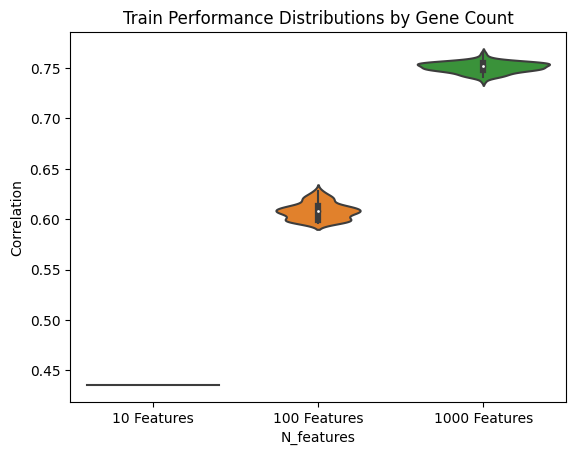

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have three lists named 'eval_10', 'eval_100', and 'eval_1000'
# Each list contains the evaluation metric values for 10, 100, and 1000 features respectively

# Combine the lists into a single DataFrame
data = {'Features': ['10 Features'] * len(train10) + ['100 Features'] * len(train100) + ['1000 Features'] * len(train1000),
        'Evaluation Metric': train10 + train100 + train1000}

df = pd.DataFrame(data)

# Create a violin plot with multiple categories
sns.violinplot(x='Features', y='Evaluation Metric', data=df)

plt.xlabel('N_features')
plt.ylabel('Correlation')

# Set the title of the plot
plt.title('Train Performance Distributions by Gene Count')

# Show the plot
plt.show()


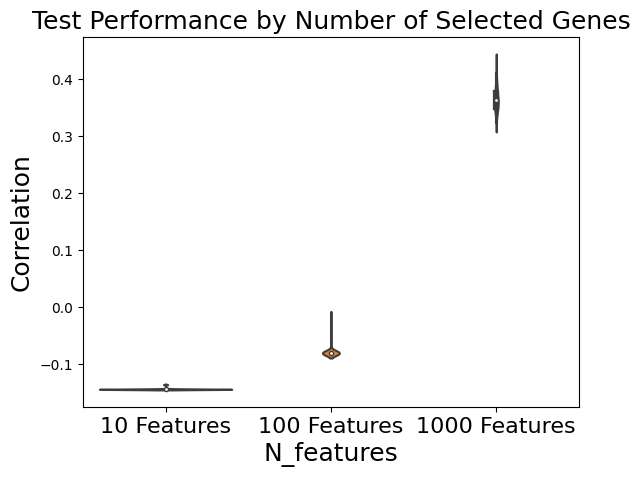

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have three lists named 'eval_10', 'eval_100', and 'eval_1000'
# Each list contains the evaluation metric values for 10, 100, and 1000 features respectively

# Combine the lists into a single DataFrame
data = {'Features': ['10 Features'] * len(train10) + ['100 Features'] * len(train100) + ['1000 Features'] * len(train1000),
        'Evaluation Metric': test10 + test100 + test1000}

df = pd.DataFrame(data)

# Create a violin plot with multiple categories
sns.violinplot(x='Features', y='Evaluation Metric', data=df, fontsize=18)

plt.xticks(fontsize=16)

plt.xlabel('N_features', fontsize=18)
plt.ylabel('Correlation', fontsize=18)

# Set the title of the plot
plt.title('Test Performance by Number of Selected Genes', fontsize=18)

# Show the plot
plt.show()


# Proteomics and transcriptomics co-expression analysis

In [ ]:
do_proteins_aggregated = do_proteins.groupby(['mouse.id', 'symbol'])['Intensity'].mean()
do_proteins_aggregated = do_proteins_aggregated.unstack(level=-1)
do_proteins_aggregated

symbol,0610007P14Rik,0610009B22Rik,0610009D07Rik,0610010K14Rik,0610011F06Rik,0610012H03Rik,0610031J06Rik,0610037L13Rik,0610040J01Rik,1-Mar,...,Zrsr1,Zscan21,Zscan26,Zswim8,Zw10,Zwint,Zyg11b,Zyx,Zzef1,l7Rn6
mouse.id,,,,,,,,,,,,,,,,,,,,,
F326,12.328491,NaN,10.245007,NaN,12.483292,11.054150,NaN,11.224331,NaN,12.577765,...,NaN,NaN,NaN,8.658362,11.121773,10.820760,7.860651,10.907780,12.518757,7.540199
F327,9.807929,9.284912,10.641698,8.486759,12.482502,7.581294,NaN,10.576704,NaN,13.243680,...,NaN,NaN,7.760427,8.670627,11.097826,8.497154,9.825585,10.890584,13.064465,8.708006
F328,10.150290,9.040226,10.252652,8.159728,12.342216,10.936458,NaN,10.650917,NaN,12.405255,...,NaN,NaN,5.983540,8.038209,10.264170,8.077885,6.825367,10.324277,11.384583,6.523241
F329,10.774629,8.482069,9.270567,6.641961,11.969485,7.903449,NaN,10.902680,NaN,13.207650,...,NaN,6.192432,NaN,7.504131,10.875471,8.362473,6.105890,10.103906,11.366480,6.332838
F330,10.379249,NaN,10.838054,5.727177,11.537256,4.628398,NaN,10.388594,6.401258,13.003821,...,NaN,NaN,NaN,7.975986,10.916940,NaN,10.832089,10.532925,11.413611,9.803991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
M421,10.685753,8.917944,9.097790,NaN,13.317899,8.944752,NaN,11.965511,NaN,13.205380,...,8.832041,NaN,NaN,7.516962,11.098744,8.510919,9.291831,10.326181,12.292280,7.871450
M422,8.035282,6.607177,8.560759,5.316257,12.745080,7.121812,NaN,10.937280,NaN,12.378966,...,NaN,NaN,6.324064,NaN,10.334111,7.616572,7.180248,10.898609,10.965781,5.143579
M423,8.349564,7.768120,10.189404,8.587349,11.863141,5.947176,NaN,11.079849,NaN,12.557824,...,NaN,NaN,NaN,7.940524,11.170057,6.890444,8.604272,9.745495,11.471339,7.824638


In [ ]:
do_gene_coexp = do_exp.corrwith(do_exp['Alb'], method='pearson')

In [ ]:
do_prot_coexp = do_proteins_aggregated.corrwith(do_proteins_aggregated['Alb'], method='pearson')

In [ ]:
top_500_coexp_proteins = do_prot_coexp.sort_values(ascending=False).iloc[:500]
top_500_coexp_proteins

symbol
Alb        1.000000
Gp9        0.899520
Kbtbd11    0.896845
Slc4a1     0.804339
Hbb-bt     0.799745
             ...   
Cd14       0.417507
Hlcs       0.417506
Fabp1      0.417506
Rap1b      0.417432
Psmc5      0.417316
Length: 500, dtype: float64

In [ ]:
top_500_coexp_genes = do_gene_coexp.sort_values(ascending=False).iloc[:500]
top_500_coexp_genes

Alb        1.000000
Afm        0.719583
F2         0.683803
Itih2      0.680949
Kng2       0.659176
             ...   
Fam177a    0.319160
Slc3a2     0.318583
Hgsnat     0.317975
Abracl     0.317587
Plppr1     0.317583
Length: 500, dtype: float64

In [ ]:
len(set(top_500_coexp_proteins.index).intersection(top_500_coexp_genes.index))

52

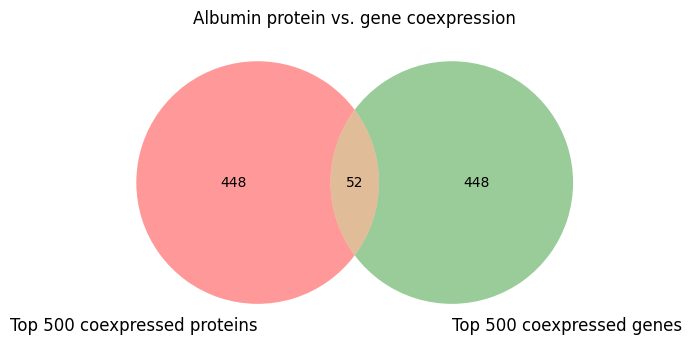

In [ ]:
!pip install matplotlib-venn
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

# Create sets A and B (replace with your own data)
A = {1, 2, 3, 4, 5}
B = {4, 5, 6, 7, 8}

# Create the Venn diagram
venn2([set(top_500_coexp_proteins.index), set(top_500_coexp_genes.index)], ('Top 500 coexpressed proteins', 'Top 500 coexpressed genes'))

# Display the plot
plt.title('Albumin protein vs. gene coexpression')
plt.show()

In [ ]:
cc_exp[[prot for prot in list(top_500_coexp_proteins.index) if prot in list(cc_exp.columns.values)]]

,Alb,Kbtbd11,Slc4a1,Hbb-bt,Apoa1,Hba-a1,Kng1,Trf,Pzp,Lsamp,...,Mrpl17,Pdk1,Rdh10,Pdss1,Ctsd,Cd14,Hlcs,Fabp1,Rap1b,Psmc5
CC001_F,16.501397,0.509060,0.145065,3.958697,12.540444,7.001298,11.069288,14.572109,12.771699,0.964973,...,4.993345,5.907508,4.634357,1.849096,7.994836,2.842083,5.719499,11.208048,5.203972,5.446070
CC001_M,16.286846,0.498211,0.201616,4.757943,12.497057,7.442261,10.921071,14.691416,12.891772,1.232582,...,4.608678,5.907358,4.414344,1.698907,7.912072,2.545238,6.009135,11.108429,5.222421,5.497319
CC002_F,16.410355,0.526438,0.051995,3.857100,12.823008,0.000000,11.078551,14.433527,12.493689,0.666445,...,4.807832,6.880290,4.527015,1.901454,7.962131,1.893597,4.209815,10.773650,5.101028,5.614714
CC002_M,16.387230,0.330398,0.000000,3.458199,12.880024,0.000000,11.047347,14.296972,12.300361,0.599051,...,4.940136,6.735645,4.669549,1.551369,7.815431,1.994716,3.965143,10.952556,5.067394,5.475534
CC003_F,16.047193,1.145551,1.058258,5.120976,12.640667,7.189522,11.301277,13.745644,11.992778,0.519005,...,4.950374,6.387097,5.189953,2.005257,8.146750,1.538564,3.950569,11.639935,5.311329,5.937084
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC080_M,16.206596,0.773628,0.259545,5.546107,12.616877,0.896789,11.299611,14.013039,12.617830,0.055779,...,5.016964,7.225864,4.762115,1.855476,8.074934,1.627267,4.143618,11.403404,5.250014,5.582257
CC081_F,16.160809,3.113821,0.214744,3.456251,11.859944,7.152540,10.868980,13.860909,12.481168,0.401627,...,4.754925,5.975267,4.750631,1.722123,8.510002,1.929306,3.872075,11.456292,5.193396,5.602520
CC081_M,15.644052,2.032313,1.729352,5.606337,12.282344,8.832743,11.039615,14.151992,12.922678,0.502679,...,4.741552,5.354882,4.373685,1.726390,8.331159,1.935559,3.647617,11.536238,5.127199,5.691240
CC082_F,16.749825,0.686584,0.969186,5.668532,12.433326,7.027194,11.405643,14.230480,12.544352,0.762591,...,4.864067,6.654422,4.861908,1.786683,8.405114,2.396783,4.840147,10.922278,5.103923,5.612656


In [ ]:
set(top_500_coexp_proteins.index).difference(set([prot for prot in list(top_500_coexp_proteins.index) if prot in list(cc_exp.columns.values)]))

{'1110004E09Rik',
 '1300017J02Rik',
 '1810043H04Rik',
 '2700050L05Rik',
 '4932431P20Rik',
 '5730508B09Rik',
 '5830473C10Rik',
 'AI607873',
 'Adat3',
 'Atp6v1e2',
 'BC027231',
 'Cfd',
 'Ckmt2',
 'Col2a1',
 'Cpb1',
 'Eef1a2',
 'Epb4.1',
 'Epb4.2',
 'Gm5506',
 'Gm5519',
 'Gp9',
 'H2afy',
 'Hbb-bh1',
 'Hist3h2ba',
 'Hist4h4',
 'Ighg3',
 'Ighv1-22',
 'Ighv1-37',
 'Ighv1-47',
 'Ighv1-82',
 'Ighv14-3',
 'Igkv12-46',
 'Igkv14-126',
 'Igkv5-45',
 'Igkv8-16',
 'Klkb1',
 'Krt20',
 'Mapk10',
 'Ppp2r4',
 'Prap1',
 'Rfwd2',
 'Rhag',
 'Rhd',
 'Rnf17',
 'Sepp1',
 'Usmg5'}

In [ ]:
# Test: cognate mRNAs for albumin interacting proteins + top X coexpressed proteins for each interacting protein
alb_ppis = ['Alb', 'Apoa1', 'Ahsg', 'Fn1', 'Sparc', 'Lrp2', 'Fcgrt', 'Cubn', 'F2', 'Serpina1a', 'Serpina1c']

features = []

for alb_ppi in alb_ppis:
  if alb_ppi in do_proteins_aggregated.columns:
    top_hits = do_proteins_aggregated.corrwith(do_proteins_aggregated[alb_ppi], method='pearson').sort_values(ascending=False)[:10].index
    features.extend(list(top_hits))

features = list(set(features))
features

['Hba-a1',
 'Azi2',
 'Slc37a2',
 'Erc2',
 'Islr',
 'Frmd4b',
 'Ankrd11',
 'Kif1a',
 'Ift140',
 'Gm9923',
 'Pzp',
 'Rab20',
 'Ptpn13',
 'Snx21',
 'Alb',
 'Cep85',
 'Cep170',
 'Eml6',
 'Lrp2',
 'F2',
 'Rbmx2',
 'Soga1',
 'Fcgrt',
 'Plekha2',
 'Eif1ad',
 'Fbxo40',
 'Tnfaip3',
 'Gga3',
 'Med6',
 'Fgb',
 'Papd4',
 'Cxxc5',
 'Ahsg',
 'Zfp280c',
 'Gnptg',
 'Hps1',
 'Plcxd2',
 'Serpina1a',
 'Fam104a',
 'Nsmce4a',
 'Slc4a1',
 'Fn1',
 'Serpinb9b',
 'Serpina3c',
 'Hbb-bt',
 'Ahdc1',
 'Dnah3',
 'Med19',
 'Dirc2',
 'Zcrb1',
 'Cd200',
 'Trf',
 'Tirap',
 'Cbx4',
 '5830473C10Rik',
 'Hdac8',
 'Kng1',
 '9430020K01Rik',
 'Gp9',
 'Sparc',
 '5730508B09Rik',
 'Kbtbd11',
 'Apoa1',
 'Nr2c2ap',
 'Anapc10',
 'Sec31b',
 'Gm4540',
 'Camsap1',
 'Hpx',
 'Gpsm2',
 'Prmt7',
 'Filip1l',
 'Actn2',
 'Sik1',
 'A2m']

In [ ]:
# This is a good set of genes for decent peformance
# Test: Cognate mRNAs of top 50 proteins coexpressed with albumin plus cognate mRNAs of the albumin protein's interaction partners
list(set(list(do_prot_coexp.sort_values(ascending=False).iloc[:50].index) + alb_ppis))

['Hba-a1',
 'Nkap',
 'Car2',
 'Ift140',
 'Pzp',
 'Stard3nl',
 'Alb',
 'Men1',
 'Fgg',
 'Lrp2',
 'Rora',
 'F2',
 'Fcgrt',
 'Fbxo40',
 'Fgb',
 'Gnptg',
 'Ahsg',
 'Gsn',
 'Serpina1a',
 'Gc',
 'Bst1',
 'Pde5a',
 'Slc4a1',
 'Themis2',
 'Nsmce4a',
 'Ip6k2',
 'Hbb-bt',
 'Ahdc1',
 'Serpina3m',
 'Bpgm',
 'Galnt12',
 'Fn1',
 'Zcrb1',
 'Bri3',
 'Cd200',
 'Sptb',
 'Trf',
 'Lsamp',
 'Rhag',
 '5830473C10Rik',
 'Ighm',
 'Hdac8',
 'Yeats2',
 'Kng1',
 'Gp9',
 'Sparc',
 'Kbtbd11',
 'Apoa1',
 'Rhd',
 'Mzt2',
 'Cubn',
 'Serpina1c',
 'Hpx',
 'Afm',
 'Spta1',
 'Ank1',
 'A2m']

In [ ]:
# Test: which proteins are correlated with Fcrgt protein abundance
do_proteins_aggregated.corrwith(do_proteins_aggregated['Fcgrt']).sort_values(ascending=False)[:10]

symbol
Fcgrt        1.000000
Plcxd2       0.985699
Erc2         0.984814
Snx21        0.971195
Cxxc5        0.969803
Cep85        0.967647
Serpinb9b    0.964690
Fam104a      0.956910
Azi2         0.953672
Ift140       0.952721
dtype: float64

In [ ]:
# Test: which mRNAs are correlated with albumin protein abundance
albumin_mRNA_coexp = do_exp.corrwith(do_proteins_aggregated['Alb']).sort_values(ascending=False)
albumin_mRNA_coexp

pheno_alb_prot_exp    0.959151
Hba-a2                0.437891
Elovl5                0.419670
Unc5b                 0.415828
Fads2                 0.414432
                        ...   
Zbtb49               -0.401323
Pja1                 -0.407243
Elp2                 -0.408114
Cyp4v3               -0.408395
Ctnnb1               -0.428192
Length: 17337, dtype: float64

In [ ]:
# Test: which mRNAs are correlated with Sparc (+ve regulator) protein abundance
sparc_mRNA_coexp = do_exp.corrwith(do_proteins_aggregated['Sparc']).sort_values(ascending=False)
sparc_mRNA_coexp

Gm5422           0.368234
Cdkl2            0.353612
Cd209c           0.352005
Tspo             0.351718
Gbe1             0.343809
                   ...   
Art2b           -0.365557
Cd209f          -0.370990
2700033N17Rik   -0.372633
Gm47289         -0.372774
Smarca1         -0.418028
Length: 17337, dtype: float64

In [ ]:
# Test: which mRNAs are correlated with Fcgrt (+ve regulator) protein abundance
fcgrt_mRNA_coexp = do_exp.corrwith(do_proteins_aggregated['Fcgrt']).sort_values(ascending=False)
fcgrt_mRNA_coexp

Erbb3       0.288681
Slk         0.282479
Kdm3a       0.276804
Agbl5       0.275160
Malt1       0.275116
              ...   
Plvap      -0.278604
Coq4       -0.287377
Gm8349     -0.290436
Palld      -0.309701
Snora73a   -0.320678
Length: 17337, dtype: float64

In [ ]:
# Test: top 25 correlated mRNAs for each protein in Albumin PPI network
alb_ppis = ['Alb', 'Apoa1', 'Ahsg', 'Fn1', 'Sparc', 'Lrp2', 'Fcgrt', 'Cubn', 'F2', 'Serpina1a', 'Serpina1c', 'Cebpb', 'Fam20c']

features = []

for alb_ppi in alb_ppis:
  if alb_ppi in do_proteins_aggregated.columns and alb_ppi in do_exp.columns:
    top_hits = do_exp.corrwith(do_proteins_aggregated[alb_ppi], method='pearson').sort_values(ascending=False)[:25].index
    features.extend(list(top_hits))

features = list(set(features))
features

['Fth-ps2',
 'Ldhd',
 'Gm12195',
 'Unc5b',
 'Lpcat3',
 'Fabp2',
 'Atp8b4',
 'Dnase1l3',
 'Gm5069',
 'Tdp1',
 'Zfp606',
 'Ppfibp1',
 '2310033P09Rik',
 'Ccdc78',
 'Nat8l',
 'Mup3',
 'Cyp2c38',
 'Cdkl2',
 'Lzts3',
 'Gm4895',
 'Ptp4a1',
 'S100a4',
 'Scd1',
 'Hbb-bt',
 'Phka2',
 'Tmed9',
 'Borcs7',
 'Il15',
 'Egfr',
 'Ido2',
 'Ash1l',
 'Abcg2',
 'Stambpl1',
 'Otud1',
 'Rassf4',
 'Neu3',
 'Nek6',
 'Gnai2',
 'Gckr',
 'Kdm4c',
 'Tmem53',
 '1700048M11Rik',
 'Erbb3',
 'Clca3a1',
 'Slc49a4',
 'Cnst',
 'Gm9311',
 'Hba-a2',
 'Rhob',
 'Homez',
 'Bin2',
 'Gm11652',
 'Glrx',
 'A730085K08Rik',
 'Zdhhc20',
 'Fscn1',
 'Pou1f1',
 'Gm10660',
 'Hira',
 'Kdm3a',
 'Tnfrsf25',
 'Tlcd1',
 'Ralgds',
 'Mmp17',
 'Dtx3',
 'Gramd1b',
 'Adamts10',
 'Rdh16',
 'Gpat3',
 'Cracr2b',
 'Tspyl2',
 'Usp28',
 'Col1a2',
 'Slc33a1',
 'Insig2',
 '4930562C15Rik',
 'Cyp2a4',
 'Tax1bp3',
 'Dennd4b',
 'Tmem17',
 'Ccdc69',
 'Cotl1',
 'Armcx6',
 'Adgrb3',
 'Slc5a11',
 'Cd36',
 'Rp9',
 'D630036H23Rik',
 'Gm10680',
 'Tmem86a',
 'Plekhg5

In [ ]:
set(albumin_mRNA_coexp.index[:1000]).intersection(set(fcgrt_mRNA_coexp.index[:1000]))

{'4732419C18Rik',
 'Cep70',
 'Csf3r',
 'Evi2b',
 'Eya2',
 'Fat4',
 'Fcrl1',
 'Fcrla',
 'Idua',
 'P2ry10',
 'Pld2',
 'Sell',
 'Siglecg'}

In [ ]:
# degrades albumin mRNA
ptbp1_mRNA_coexp = do_exp.corrwith(do_proteins_aggregated['Ptbp1']).sort_values(ascending=False)

In [ ]:
ptbp1_mRNA_coexp

pheno_alb_prot_exp    0.288308
Ccdc78                0.257894
Gm14406               0.244247
Gm8623                0.239277
Clstn1                0.230875
                        ...   
Zfp182               -0.236765
Ptges3               -0.241809
Klre1                -0.243181
Tspan5               -0.243408
Slc26a6              -0.250275
Length: 17337, dtype: float64

In [ ]:
set(ptbp1_mRNA_coexp.index[:1000]).intersection(set(albumin_mRNA_coexp.index[:1000]))

{'2500004C02Rik',
 '4732419C18Rik',
 'Adamts6',
 'Adamtsl1',
 'Apbb1',
 'Apobec3',
 'Arhgap10',
 'C1qtnf1',
 'Cand2',
 'Cep112',
 'Chmp4c',
 'Chrna4',
 'Dgkz',
 'Entpd2',
 'Ephb6',
 'Fabp5',
 'Flt4',
 'Fsd2',
 'Gapdhs',
 'Gm6787',
 'Hpcal1',
 'Hspg2',
 'Lrriq3',
 'Mageh1',
 'Micall2',
 'Mlkl',
 'Naaa',
 'Nagk',
 'Nkiras2',
 'Pcdhb7',
 'Peg12',
 'Phpt1',
 'Pik3ip1',
 'Pip4k2c',
 'Plekhd1',
 'Rap1gap',
 'Rnf166',
 'Slc43a3',
 'Slfn1',
 'Smim3',
 'Soat2',
 'Sytl5',
 'Tbc1d31',
 'Tm4sf1',
 'Zfp202',
 'Zfp28',
 'pheno_alb_prot_exp'}

In [ ]:
albumin_mRNA_to_protein = do_proteins_aggregated.corrwith(do_exp['Alb']).sort_values(ascending=False)

In [ ]:
albumin_mRNA_to_protein

symbol
Apoa2        0.828958
Mppe1        0.793638
Micu3        0.691150
Capn15       0.685718
Rpl21-ps4    0.681038
               ...   
Rbmx2       -0.716237
Gm12728     -0.738577
Dna2        -0.751181
Med19       -0.767656
Rabl5       -0.820540
Length: 8358, dtype: float64

In [ ]:
set(albumin_mRNA_to_protein.index[:10]).union(set(albumin_mRNA_coexp.index[:10]))

{'5830473C10Rik',
 'Apoa2',
 'Capn15',
 'Cd36',
 'Cyp2a4',
 'Elovl5',
 'Fads1',
 'Fads2',
 'Fbn2',
 'Hba-a2',
 'Hbb-bs',
 'Hbb-bt',
 'Micu3',
 'Mppe1',
 'Nr2c2',
 'Rpl21-ps4',
 'Smim8',
 'Unc5b',
 'Zc3h12a',
 'pheno_alb_prot_exp'}

In [ ]:
set(ptbp1_mRNA_coexp.index[:5])

{'Ccdc78', 'Clstn1', 'Gm14406', 'Gm8623', 'pheno_alb_prot_exp'}

In [ ]:
set(fcgrt_mRNA_coexp.index[:5])

{'Agbl5', 'Erbb3', 'Kdm3a', 'Malt1', 'Slk'}

In [ ]:
set(sparc_mRNA_coexp.index[:5])

{'Cd209c', 'Cdkl2', 'Gbe1', 'Gm5422', 'Tspo'}

In [ ]:
list(list(set(sparc_mRNA_coexp.index[:25])) + list(set(fcgrt_mRNA_coexp.index[:25])) + list(set(ptbp1_mRNA_coexp.index[:25])) + list(set(albumin_mRNA_to_protein.index[:25])))

['Gm11652',
 '1700086O06Rik',
 'Gm5069',
 'Tdp1',
 'A230056P14Rik',
 'Cdkl2',
 'Tspo',
 'Mrpl42',
 'Gm12161',
 '4931440P22Rik',
 'Tax1bp3',
 'Gm5422',
 'Ndufab1',
 'Rassf4',
 'Cd209c',
 'Mcc',
 'Rpl39-ps',
 'Arhgef16',
 'Uqcc6',
 'Nenf',
 'Lman2',
 'Gbe1',
 'Gm15495',
 'Gm6345',
 'Gm11827',
 'Nsmaf',
 'Ptbp2',
 'Zdhhc20',
 'Fam76b',
 'Kdm3a',
 'Zfp626',
 'Zfp606',
 'Ppfibp1',
 'Zfp109',
 'Gabpb2',
 'Fnbp1',
 'Ptbp3',
 'Agbl5',
 'Usp28',
 'Ash1l',
 'Malt1',
 'Tcp11l2',
 'Rictor',
 'Kdm4c',
 'Erbb3',
 'Slk',
 'Syne2',
 'Fth-ps2',
 'Mtmr3',
 'Heca',
 'pheno_alb_prot_exp',
 'Trim43b',
 'Gm7589',
 'Gm2568',
 'Fan1',
 'Rpl10a-ps4',
 'Gm14406',
 'Wif1',
 'Dynlt1b',
 'Ccdc78',
 'A130051J06Rik',
 'Gm8623',
 'Gm20521',
 'Smyd1',
 'Tmc5',
 'Map1a',
 'Alkbh3os1',
 'Capn12',
 'Plch1',
 'Msln',
 'Gm47512',
 'Carmil3',
 'Clstn1',
 'Nim1k',
 'Adamts3',
 'F8',
 'Rab3b',
 'Islr',
 'Gprc5a',
 'Capn15',
 'Sipa1l3',
 'Ctnna3',
 'Osbpl10',
 'Fbn2',
 'Rpl21-ps4',
 'Micu3',
 'Apoa2',
 'Tgm1',
 'Smim8',
 'Myh3

# Plot train/test distributions

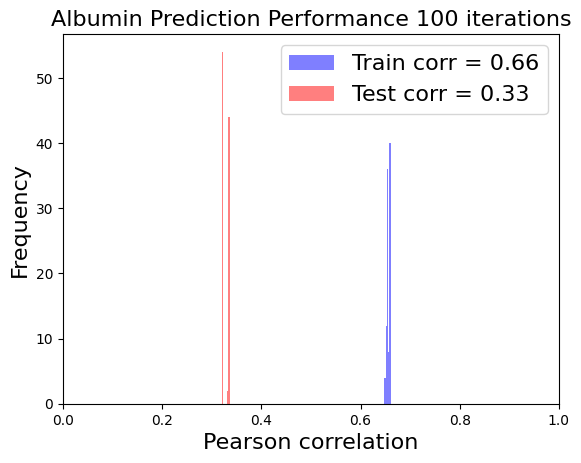

In [ ]:
import numpy as np

def plot_correlation_histogram(train_corr, test_corr):
    train_mean = np.mean(train_corr)
    test_mean = np.mean(test_corr)

    # Plotting histograms
    plt.hist(train_corr, bins=5, alpha=0.5, label=f'Train corr = {train_mean:.2f}', color='blue')
    plt.hist(test_corr, bins=5, alpha=0.5, label=f'Test corr = {test_mean:.2f}', color='red')

    # plt.axvline(x=train_mean, color='blue', linestyle='--')
    # plt.axvline(x=test_mean, color='red', linestyle='--')

    plt.xlim(0, 1)

    # Adding labels and title
    plt.xlabel('Pearson correlation', fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.title(f'Albumin Prediction Performance {len(train_corr)} iterations', fontsize=16)

    # Adding legend
    plt.legend(loc='upper right', fontsize=16)

    # Display the plot
    plt.show()

# Example usage
train_corr = [0.6548113129089848, 0.6592008028086924, 0.6541696697894983, 0.657557179565601, 0.6605726161352985, 0.6541696697894983, 0.6563694098607049, 0.6478259172159307, 0.6605726161352985, 0.6561186079077967, 0.6511433452502018, 0.6599918106892819, 0.6599918106892819, 0.657557179565601, 0.6541696697894983, 0.6548113129089848, 0.6548113129089848, 0.657557179565601, 0.6541696697894983, 0.6511433452502018, 0.6548113129089848, 0.6599918106892819, 0.6605726161352985, 0.6605726161352985, 0.6592008028086924, 0.6548113129089848, 0.649257860068218, 0.6599918106892819, 0.6569108751294652, 0.6590754547590623, 0.6541696697894983, 0.657557179565601, 0.6605726161352985, 0.6533774025678298, 0.6548113129089848, 0.6548113129089848, 0.6608163382603724, 0.6541696697894983, 0.6605726161352985, 0.6541696697894983, 0.6505415018399092, 0.6548113129089848, 0.6541696697894983, 0.6569108751294652, 0.6599918106892819, 0.6548113129089848, 0.6605726161352985, 0.650349730807901, 0.6599918106892819, 0.6478259172159307, 0.6541696697894983, 0.6541696697894983, 0.6548113129089848, 0.6605726161352985, 0.6599918106892819, 0.6592008028086924, 0.652808034207397, 0.6541696697894983, 0.6608163382603724, 0.6605726161352985, 0.6518502863566983, 0.6599918106892819, 0.652477563428286, 0.6548113129089848, 0.6533774025678298, 0.652808034207397, 0.6605726161352985, 0.6533774025678298, 0.651128559030008, 0.6599918106892819, 0.6605726161352985, 0.6548113129089848, 0.6548113129089848, 0.6592008028086924, 0.6505415018399092, 0.6533774025678298, 0.6592008028086924, 0.6548113129089848, 0.6548113129089848, 0.6548113129089848, 0.6605726161352985, 0.6520850554628155, 0.6599918106892819, 0.6605726161352985, 0.6605726161352985, 0.6605726161352985, 0.6548113129089848, 0.6555448822896144, 0.6603051810142821, 0.6605726161352985, 0.6548113129089848, 0.6605726161352985, 0.6599918106892819, 0.6518502863566983, 0.6548113129089848, 0.6586920406015233, 0.6599918106892819, 0.6605726161352985, 0.6518502863566983, 0.6548113129089848]
test_corr = [0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.332307368597985, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.332307368597985, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.31993677579402346, 0.31993677579402346, 0.31993677579402346, 0.33676968650942096, 0.33676968650942096, 0.31993677579402346]


plot_correlation_histogram(train_corr, test_corr)

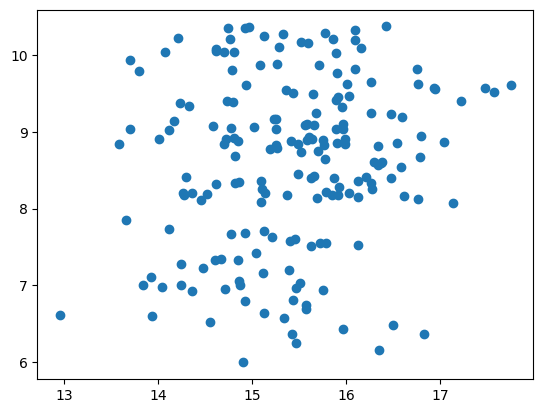

In [ ]:
plt.scatter(do_proteins_aggregated['Alb'], do_proteins_aggregated['Fcgrt'])

In [ ]:
do_proteins_aggregated['Alb'].corr(do_proteins_aggregated['Fcgrt'])

0.16137360287579885

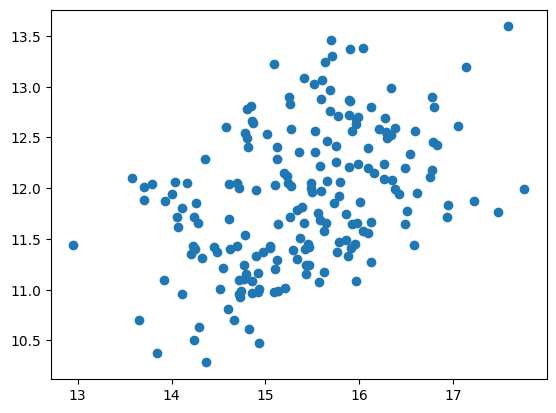

In [ ]:
plt.scatter(do_proteins_aggregated['Alb'], do_proteins_aggregated['Ahsg'])

In [ ]:
do_proteins_aggregated['Alb'].corr(do_proteins_aggregated['Ahsg'])

0.4207484537034503

In [ ]:
do_prot_coexp.sort_values(ascending=False)

symbol
Alb              1.000000
Gp9              0.899520
Kbtbd11          0.896845
Slc4a1           0.804339
Hbb-bt           0.799745
                   ...   
BC005561        -0.719769
Cyp2g1          -0.722650
Dvl2            -0.740696
Znrf1           -0.758389
2610018G03Rik   -0.821127
Length: 8358, dtype: float64

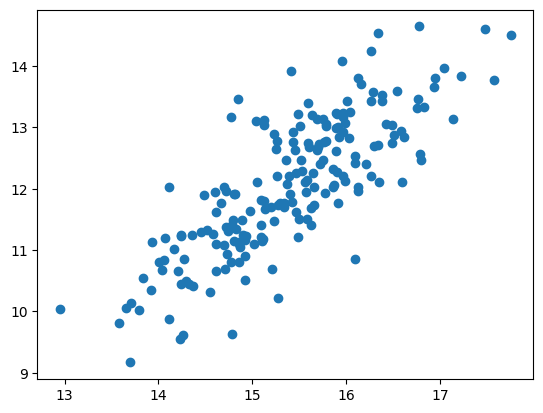

In [ ]:
plt.scatter(do_proteins_aggregated['Alb'], do_proteins_aggregated['Slc4a1'])

# Collaborative Cross phosphoproteomics correlation analysis

In [ ]:
liver_phos = pd.read_csv('/content/drive/MyDrive/JHU/Cahan Lab/TMT_mouse_data/liver_phosphopeptides_processed.csv')
liver_phos

,Protein.Id,gene_symbol,Site.Position,Max.Score,Motif,Sum,sample_id,Intensity.Phos,protein.id,sample.id,strain,Birthdate,Sex,MouseID,Batch,Norm.Liver,tag,mouse.id
0,ENSMUSP00000055694.6,Cavin2,218,1000.000000,EEALEDSAEEKME,1850.554495,Liver_TMT12.126_sn_sum,7.200069,ENSMUSP00000055694,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
1,ENSMUSP00000055694.6,Cavin2,359,38.775778,ARRGNNSAVGSNA,140.174743,Liver_TMT12.126_sn_sum,3.862559,ENSMUSP00000055694,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
2,ENSMUSP00000055694.6,Cavin2,293,37.539838,SSPFKVSPLSFGR,2559.771858,Liver_TMT12.126_sn_sum,7.870060,ENSMUSP00000055694,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
3,ENSMUSP00000055694.6,Cavin2,27,30.069998,EKPSSPSPMPSST,956.897039,Liver_TMT12.126_sn_sum,6.516710,ENSMUSP00000055694,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
4,ENSMUSP00000006625.7,Rbm14,206,1000.000000,GQARQPTPPFFGR,1796.470982,Liver_TMT12.126_sn_sum,7.389744,ENSMUSP00000006625,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524497,ENSMUSP00000019512.7,Sec14l4,401,48.873950,QGLGSVSPPxxxx,1612.561073,Liver_TMT7.131c_sn_sum,7.091407,ENSMUSP00000019512,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge
524498,ENSMUSP00000039704.6,Parp12,273,38.370783,DSSGPVSPGTPSQ,871.146521,Liver_TMT7.131c_sn_sum,6.427927,ENSMUSP00000039704,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge
524499,ENSMUSP00000041611.7,Sh2b3,129,50.804572,QLFRRRSAGELPG,1357.271948,Liver_TMT7.131c_sn_sum,6.937179,ENSMUSP00000041611,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge
524500,ENSMUSP00000144808.1,Klf15,237,27.120518,AGTGPASPGQAPE,1660.544992,Liver_TMT7.131c_sn_sum,7.377132,ENSMUSP00000144808,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge


In [ ]:
liver_phos[liver_phos['gene_symbol'] == 'Ahsg']

,Protein.Id,gene_symbol,Site.Position,Max.Score,Motif,Sum,sample_id,Intensity.Phos,protein.id,sample.id,strain,Birthdate,Sex,MouseID,Batch,Norm.Liver,tag,mouse.id
188,ENSMUSP00000023583.5,Ahsg,309,93.154181,AFSPVASVESASG,345.679486,Liver_TMT12.126_sn_sum,4.930257,ENSMUSP00000023583,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
189,ENSMUSP00000023583.5,Ahsg,138,87.264997,CHSTPDSAEDVRK,8949.867227,Liver_TMT12.126_sn_sum,9.826365,ENSMUSP00000023583,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
190,ENSMUSP00000023583.5,Ahsg,312,39.662889,PVASVESASGETL,3352.657064,Liver_TMT12.126_sn_sum,8.740609,ENSMUSP00000023583,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
191,ENSMUSP00000023583.5,Ahsg,314,33.657191,ASVESASGETLHS,1937.425701,Liver_TMT12.126_sn_sum,7.634458,ENSMUSP00000023583,TMT12~126,CC009,NaN,M,CC009-M-019,TMT12,1.073,126,CC009_M
3002,ENSMUSP00000023583.5,Ahsg,309,93.154181,AFSPVASVESASG,345.679486,Liver_TMT12.127n_sn_sum,4.859473,ENSMUSP00000023583,TMT12~127n,CC051,NaN,F,CC051-F-7538,TMT12,1.078,127n,CC051_F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516950,ENSMUSP00000023583.5,Ahsg,314,33.657191,ASVESASGETLHS,1685.478062,Liver_TMT7.131_sn_sum,6.640957,ENSMUSP00000023583,TMT7~131,CC027,5/23/2018,M,CC027-M-2793,TMT7,1.082,131,CC027_M
520876,ENSMUSP00000023583.5,Ahsg,309,93.154181,AFSPVASVESASG,5285.643461,Liver_TMT7.131c_sn_sum,8.880493,ENSMUSP00000023583,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge
520877,ENSMUSP00000023583.5,Ahsg,138,87.264997,CHSTPDSAEDVRK,10719.480978,Liver_TMT7.131c_sn_sum,9.927983,ENSMUSP00000023583,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge
520878,ENSMUSP00000023583.5,Ahsg,312,39.662889,PVASVESASGETL,4420.345018,Liver_TMT7.131c_sn_sum,8.507144,ENSMUSP00000023583,TMT7~131c,Bridge,Bridge,Bridge,Bridge,TMT7,1.077,131c,Bridge _Bridge


In [ ]:
def get_protein_level_phosphorylation_intensities(liver_phos, gene_symbol):
  # Step 1: Filter DataFrame by gene symbol
  filtered_df = liver_phos[liver_phos['gene_symbol'] == gene_symbol]

  # Step 2: Group by 'mouse.id' and 'motif'
  grouped_df = filtered_df.groupby(['mouse.id'])

  # Step 3: Apply mean aggregation to 'phos.intensity' within each group
  result_df = grouped_df['Intensity.Phos'].mean().reset_index()

  result_df = result_df.set_index('mouse.id')
  return result_df

In [ ]:
get_protein_level_phosphorylation_intensities(liver_phos, 'Ahsg')

,Intensity.Phos
mouse.id,
Bridge _Bridge,8.768994
CC001_F,8.430156
CC001_M,9.263061
CC002_F,8.740616
CC002_M,8.971783
...,...
CC080_M,8.921487
CC081_F,8.139953
CC081_M,8.387711


In [ ]:
get_protein_level_phosphorylation_intensities(liver_phos, 'Fga')

,Intensity.Phos
mouse.id,
Bridge _Bridge,4.965147
CC001_F,4.049951
CC001_M,5.288913
CC002_F,4.235089
CC003_M,5.403377
...,...
CC080_M,4.990601
CC081_F,4.874658
CC081_M,4.411005


In [ ]:
cc_proteins_aggregated = cc_proteins.groupby(['mouse.id', 'symbol'])['Intensity'].mean()
cc_proteins_aggregated = cc_proteins_aggregated.unstack(level=-1)
cc_proteins_aggregated

symbol,0610009B22Rik,0610010K14Rik,0610012G03Rik,0610037L13Rik,0610040J01Rik,1110004E09Rik,1110004F10Rik,1110008F13Rik,1110008L16Rik,1110012L19Rik,...,mt-Atp8,mt-Co1,mt-Co2,mt-Co3,mt-Nd1,mt-Nd2,mt-Nd3,mt-Nd4,mt-Nd4l,mt-Nd5
mouse.id,,,,,,,,,,,,,,,,,,,,,
CC001_F,5.430677,9.469017,6.159521,10.353464,5.601143,NaN,7.491732,8.839010,9.600635,NaN,...,9.591877,4.268202,11.968811,7.115185,10.086086,7.643049,NaN,11.066082,5.751084,8.934072
CC001_M,NaN,7.618517,NaN,9.330719,7.156791,NaN,NaN,6.774791,9.253716,NaN,...,8.050304,6.441595,10.607530,NaN,9.268037,NaN,NaN,9.908422,NaN,9.236399
CC002_F,5.788985,9.910080,5.917029,10.273822,5.809215,NaN,8.164593,8.980897,9.823546,NaN,...,10.569622,4.598675,11.996016,7.876870,10.111534,7.764971,NaN,11.112901,5.593042,8.839061
CC002_M,4.780732,9.715336,7.606288,9.965723,7.678075,4.767520,NaN,9.188172,8.620617,7.332392,...,9.511056,8.365230,11.718070,NaN,11.013278,7.917303,NaN,10.312709,8.193764,9.963592
CC003_F,4.482050,NaN,NaN,10.296496,4.699267,6.130971,9.403707,8.250415,8.149067,5.640397,...,7.044944,9.924820,11.502282,NaN,9.593210,NaN,4.436945,9.830522,NaN,9.269795
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CC081_F,NaN,7.497788,NaN,9.535354,6.934659,NaN,NaN,6.640778,9.343364,NaN,...,7.567442,7.773254,10.699125,NaN,9.679305,NaN,NaN,10.068212,NaN,9.350185
CC081_M,8.668686,8.048621,6.991827,10.558425,6.985061,NaN,7.968093,9.349807,9.301481,7.418724,...,7.135002,6.735509,11.810670,NaN,8.260871,7.887557,NaN,10.319662,4.367807,8.972575
CC082_F,7.373772,9.235648,8.489713,10.560457,6.685693,NaN,NaN,9.437813,9.266233,NaN,...,7.584489,8.185719,11.466875,NaN,11.247798,NaN,5.464654,11.427305,8.468795,9.201819


In [ ]:
cc_proteins_aggregated['Alb']

mouse.id
CC001_F    14.900074
CC001_M    15.140626
CC002_F    14.726681
CC002_M    14.907900
CC003_F    14.554345
             ...    
CC081_F    14.293368
CC081_M    14.422267
CC082_F    15.623315
CC082_M    14.675374
NA_NA      15.031846
Name: Alb, Length: 117, dtype: float64

In [ ]:
from scipy.stats import pearsonr

def plot_alb_corr(liver_phos, cc_proteins_aggregated, phos_prot, ref_prot='Alb'):
  phos_intensities = get_protein_level_phosphorylation_intensities(liver_phos, phos_prot)
  shared_idx = list(set(phos_intensities.index).intersection(set(cc_proteins_aggregated.index)))

  x, y = phos_intensities.loc[shared_idx]['Intensity.Phos'], cc_proteins_aggregated[ref_prot].loc[shared_idx]
  plt.scatter(x, y)

  r, _ = pearsonr(x.values, y.values)
  plt.text(0.675, 0.025, f'Pearson\'s r = {r:.2f}', fontsize=12, transform=plt.gca().transAxes)

  plt.xlabel(f'Phosphorylated {phos_prot} log2 intensity')
  plt.ylabel(f'{ref_prot} log2 intensity')
  plt.title(f'Phosphorylated {phos_prot} vs. {ref_prot} scatterplot')
  plt.show()

In [ ]:
def plot_unphos_alb_corr(cc_proteins_aggregated, unphos_prot, ref_prot='Alb'):

  x, y = cc_proteins_aggregated[unphos_prot], cc_proteins_aggregated[ref_prot]
  plt.scatter(x,y)

  r, _ = pearsonr(x, y)
  plt.text(0.675, 0.025, f'Pearson\'s r = {r:.2f}', fontsize=12, transform=plt.gca().transAxes)

  plt.xlabel(f'Unphosphorylated {unphos_prot} log2 intensity')
  plt.ylabel(f'{ref_prot} log2 intensity')
  plt.title(f'Unphosphorylated {unphos_prot} vs. {ref_prot} scatterplot')
  plt.show()

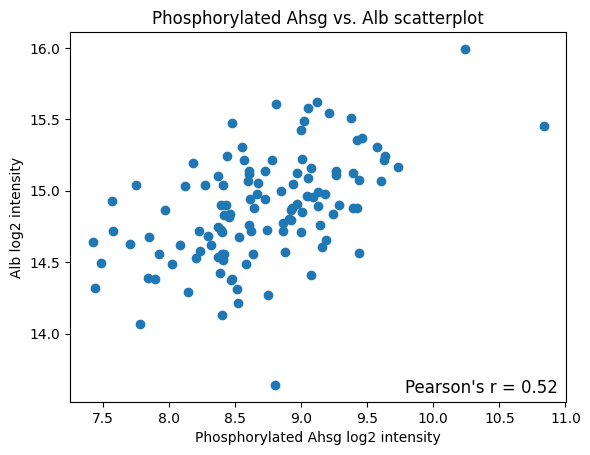

In [ ]:
plot_alb_corr(liver_phos, cc_proteins_aggregated, 'Ahsg')

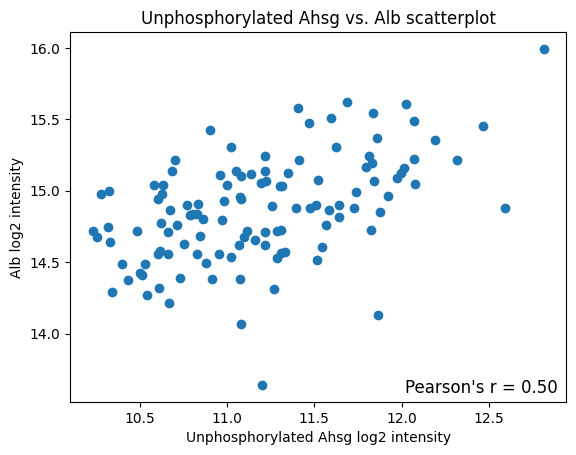

In [ ]:
plot_unphos_alb_corr(cc_proteins_aggregated, 'Ahsg')

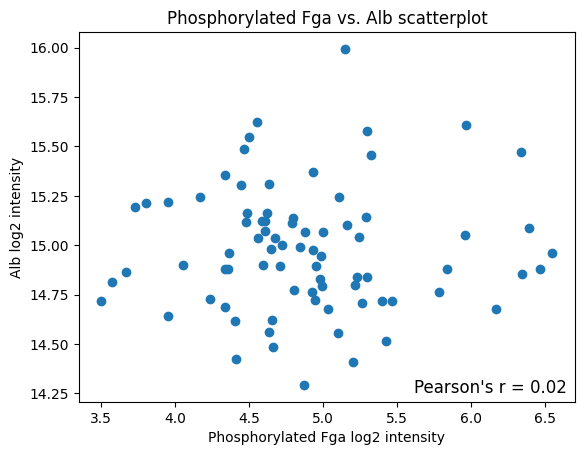

In [ ]:
plot_alb_corr(liver_phos, cc_proteins_aggregated, 'Fga')

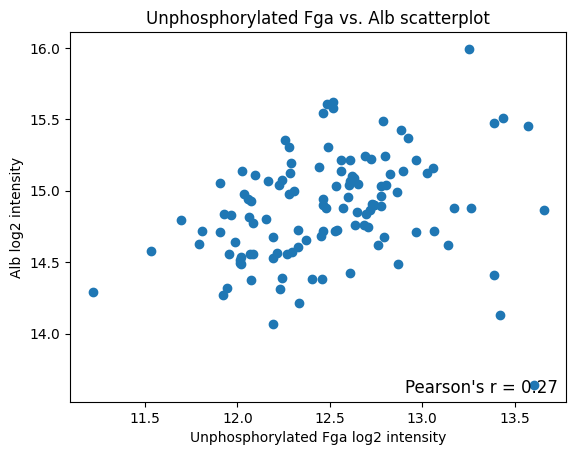

In [ ]:
plot_unphos_alb_corr(cc_proteins_aggregated, 'Fga')

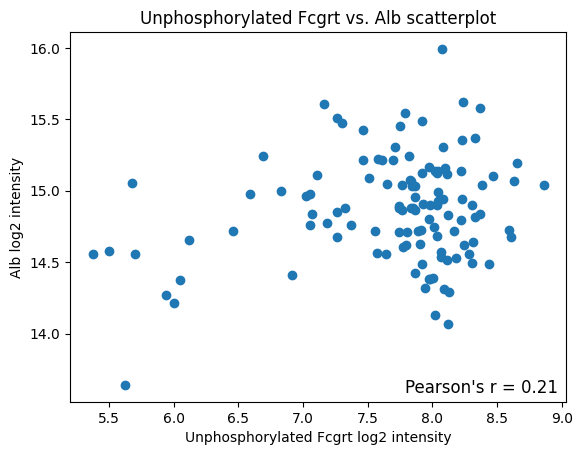

In [ ]:
plot_unphos_alb_corr(cc_proteins_aggregated, 'Fcgrt')

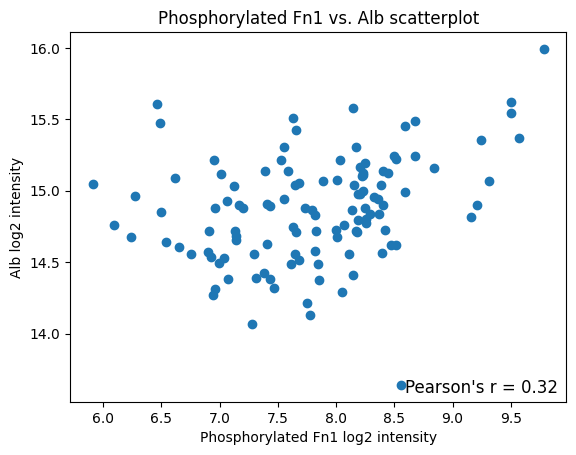

In [ ]:
plot_alb_corr(liver_phos, cc_proteins_aggregated, 'Fn1')

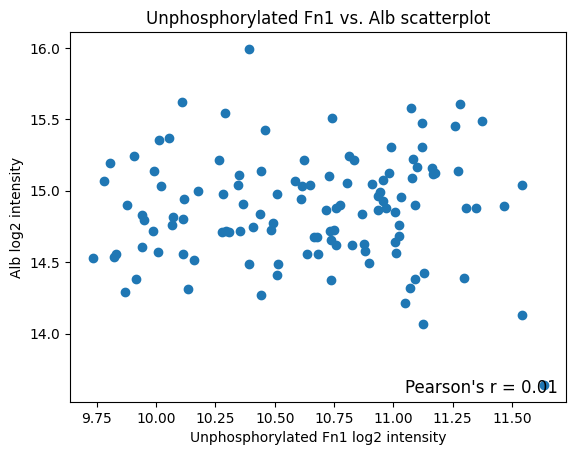

In [ ]:
plot_unphos_alb_corr(cc_proteins_aggregated, 'Fn1')

In [ ]:
cc_proteins_aggregated.corrwith(cc_proteins_aggregated['Alb']).sort_values(ascending=False)

symbol
Alb       1.000000
Gypc      0.897726
P4ha2     0.803713
Natd1     0.797052
Smyd3     0.790914
            ...   
Pcsk9    -0.790042
Mef2a    -0.795300
Ing4     -0.806348
Igfbp1   -0.827173
Trub2    -0.855475
Length: 8233, dtype: float64

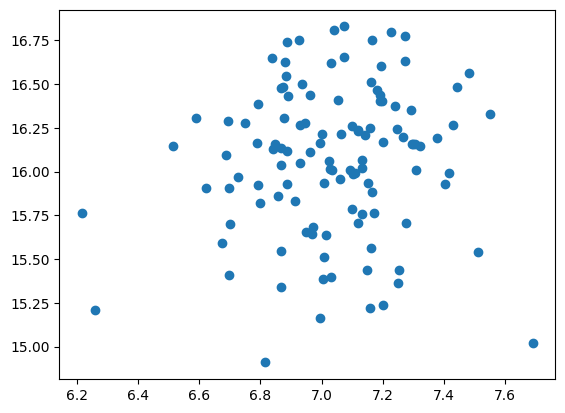

In [ ]:
plt.scatter(cc_exp['Fcgrt'], cc_exp['Alb'])